# Problem Statement:

Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
 
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using __EDA__ is the aim of this case study.

 

In other words, the company wants to understand the __driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default__.  The company can utilise this knowledge for its portfolio and risk assessment. 

__loan.csv__ is the data set provided. This file contains complete loan data for all loans issued through the time period 2007 to 2011.

In [1]:
#Importing all the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the given dataset
loan = pd.read_csv('loan.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#The raw dataset row is having 39717 and column 111
loan.shape

(39717, 111)

In [4]:
loan.index.value_counts().count()

39717

# Data Cleaning 

#### 1. Extacting all the coulmns having only null values. These columns will be discarded as it will not aid our analysis. 

In [5]:
#To view only
NAcolumns = loan.columns[(loan.isnull().sum()==loan.index.value_counts().count())]
loan[NAcolumns]

,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Dropping all the columns having null values. 
#how =all condition drops only the null columns
loan.dropna(how='all', axis=1,inplace=True)

In [7]:
#After dropping Null columns, the new column count is 57. So, 54 columns have been dropped.
loan.shape

(39717, 57)

In [8]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### 2. We further notice following items which doesn't aid out analysis and those columns have been dropped:
    a. Columns which have mostly ZEROs or NA.
    b. Columns having one type of category 
    b. Loan applicants defined strings
    c. Columns having minimal data less than 10%
-----

__Following Columns are dropped:__
1. __emp_title__: This is employee defined field, its difficult and time consuming to categoriz with provided information.
2. __pymnt_plan__ : Indicates if a payment plan has been put in place for the loan. 
   The column has only __n__ which doesn't give any meaning or add value.
3. __url__: URL for the LC page with listing data. This URL column will not add any value and is dropped
4. __title__: The loan title provided by the borrower
    This is varying string field, time consuming to categorize. So, this doesn't help for our analysis.
5. __initial_list_status__ : It has only type __f__  
6. __next_pymnt_d__: Next scheduled payment date. As this information will not help in our analysis, this will be dropped.<br>
   Also, this field has only few avaiable values and rest are blank
7. __collections_12_mths_ex_med__: Number of collections in 12 months excluding medical collections
   All the loan applicants have either 0 or NA.
8. __policy_code__: "publicly available policy_code=1 /new products not publicly available policy_code=2"
   All the users are with code 1.
9. __application_type__: Indicates whether the loan is an individual application or a joint application with two co-borrowers
   All loan applicants are Individual and there are no joint applicants.
10. __out_prncp,out_prncp_inv__: total values are only 1140 and rest are 0. This can be dropped
11. __delinq_amnt__: The past-due amount owed for the accounts on which the borrower is now delinquent.
    All borrowrs have 0, so dropped this column.
    delinquent: A loan becomes delinquent when the borrower make payments late (even by one day) or miss a regular installment payments.
   
12. __acc_now_delinq__: The number of accounts on which the borrower is now delinquent. All borrowrs have 0.
13. __chargeoff_within_12_mths__: Number of charge-offs within 12 months. The values are either 0 or NAN.

    Defination of charge off Debt: A charge-off means a company has written off a debt because it does not believe it will receive the money that it’s owed. Still debetor is responsible for payment of debt. Having a charge-off on borrowers credit report can negatively affect borrowers ability to get future loans. 
 
14. __tax_liens__: Number of tax liens
    As per the data set, some of the loan applicants tax liens are 0 and for some data NA.
    
    Defination of tax liens:
    A tax lien is a legal claim against the assets of an individual or business that fails to pay taxes owed to the government
    For ex, when a landowner or houseowner fails to pay the taxes on their property, the city or county in which the property is located has the authority to place a lien on the property.
    Tax lien certificates are documents that represent a legal claim against a property with unpaid property taxes
    
15. __id__: A unique LC assigned ID for the loan listing. We are not concerned about individual applicants, so dropped
16. __mths_since_last_record__ : 92% of data is null, so dropping this column
17. __desc__: desc only 32% missing. This is a varying string field and purpose field can be used to categorize on loans taken. So, this is dropped.
18. __member_id__ : As we are checking the factors causing default, individual IDs will not help our analysis.
    

In [10]:
#Commands used to check before dropping all the columns
#loan.emp_length
#loan.pymnt_plan.nunique()
#loan.initial_list_status.unique()
#loan.emp_title.info()
#pd.DataFrame(loan.out_prncp.values.nonzero()).shape --1140
#loan.next_pymnt_d.notnull().sum()    -- 1140 
#loan.acc_now_delinq.sum()
#loan.chargeoff_within_12_mths.unique()

In [11]:
loan.drop(['id','member_id','emp_title','url','title','initial_list_status','next_pymnt_d','collections_12_mths_ex_med','policy_code','application_type','delinq_amnt','acc_now_delinq','chargeoff_within_12_mths','tax_liens','zip_code','desc','mths_since_last_record','pymnt_plan','out_prncp','out_prncp_inv'],axis=1, inplace=True)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [12]:
loan.isnull().mean()*100

loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.125891
total_acc                   0.000000
total_pymnt                 0.000000
t

In [13]:
loan.shape

(39717, 37)

#### 3. Modification made in following Columns:
1. term is in months: remove the months string and change the header to term in months
2. int_rate and revol_util: remove the % and make to float variable
3. issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d: seggregate it to month/year
4. emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means      ten or more years. >> change less than 1 year as 0, removed years string, 10+ as 10

In [14]:
#Changing the column names and values:
loan.rename(columns={'term':'term_in_mnt'},inplace=True) #loan.term_in_mnt = loan.term_in_mnt.apply(lambda x:int(x.replace('months','')))
loan.int_rate = loan.int_rate.apply(lambda x: float(x.rstrip('%')))

#Note: revol util has few rows with NA, so those NA rows are skipped
loan.revol_util = loan[loan.revol_util.notnull()].revol_util.apply(lambda x: float(str(x).rstrip('%')))

In [15]:
def yearstrip(x):
    if '10+ years' in str(x):
        x=10
        return x
    elif '< 1 year' in str(x):
        x=0
        return x
    else:
        return int(str(x).split(' ')[0])
loan.emp_length = loan[loan.emp_length.notnull()].emp_length.apply(yearstrip)

In [16]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_mnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0.0,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1.0,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [17]:
loan['issue_m'] = pd.to_datetime(loan.issue_d, format='%b-%y').dt.month
loan['issue_y'] = pd.to_datetime(loan.issue_d, format='%b-%y').dt.year
loan['earliest_cr_line_m'] = pd.to_datetime(loan.earliest_cr_line, format='%b-%y').dt.month
loan['earliest_cr_line_y'] = pd.to_datetime(loan.earliest_cr_line, format='%b-%y').dt.year
loan['last_pymnt_m'] = pd.to_datetime(loan.last_pymnt_d, format='%b-%y').dt.month
loan['last_pymnt_y'] = pd.to_datetime(loan.last_pymnt_d, format='%b-%y').dt.year
loan['last_credit_pull_m'] = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y').dt.month
loan['last_credit_pull_y'] = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y').dt.year


In [18]:
loan.shape

(39717, 45)

In [19]:
#Years earlier to 1970 are prefixed with 20xx, so subtracting with 100
loan.earliest_cr_line_y[loan.earliest_cr_line_y > 2017].unique()

array([2062, 2068, 2064, 2067, 2065, 2063, 2054, 2066, 2059, 2056, 2046,
       2050, 2061])

In [20]:
loan.earliest_cr_line_y[loan.earliest_cr_line_y > 2017] = loan.earliest_cr_line_y[loan.earliest_cr_line_y > 2017] - 100

In [21]:
loan.earliest_cr_line_y

0        1985
1        1999
2        2001
3        1996
4        1996
         ... 
39712    1990
39713    1986
39714    1998
39715    1988
39716    2003
Name: earliest_cr_line_y, Length: 39717, dtype: int32

#### 4. Imputing missing values

a. HOME OWNERSHIP:<br> 
`Note: Only 3 NONE types are there, so imputing NONE with OTHER`

In [22]:
print(loan.home_ownership.value_counts())

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64


In [23]:
loan.home_ownership.mask(loan.home_ownership=='NONE','OTHER',inplace=True)

In [24]:
print(loan.home_ownership.value_counts())
loan.shape

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER         101
Name: count, dtype: int64


(39717, 45)

b. Employee Length:

<Axes: ylabel='Frequency'>

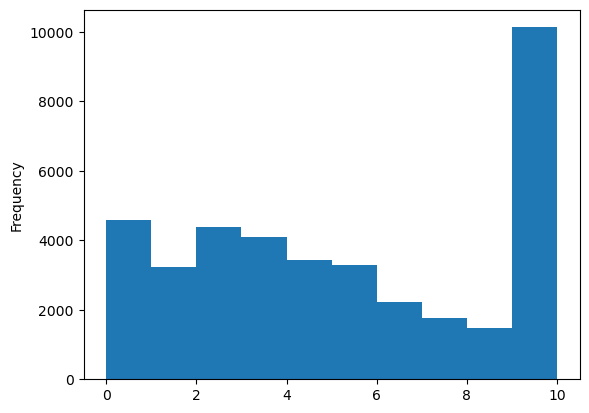

In [25]:
loan.emp_length.plot.hist()

`Manjority have them opened account before 2000, so imputing 10 for there borrowers`

In [26]:
#Credit lined pulled after 2000
print(loan[loan.earliest_cr_line_y > 2000].emp_length.describe())
emplen20 = loan[loan.earliest_cr_line_y > 2000].emp_length.quantile(0.75)

count    11386.000000
mean         3.446162
std          2.844985
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         10.000000
Name: emp_length, dtype: float64


In [27]:
#Credit lined pulled before or on 2000
print(loan[loan.earliest_cr_line_y <= 2000].emp_length.describe())
emplenpre20 = loan[loan.earliest_cr_line_y < 2000].emp_length.quantile(0.75)

count    27256.000000
mean         5.611462
std          3.637527
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         10.000000
Name: emp_length, dtype: float64


In [28]:
#Employee length Null values
loan.emp_length.isna().sum()

1075

In [29]:
#Imputing for employeed who have opened credit line after 2000
loan['emp_length'][loan.earliest_cr_line_y > 2000] = loan[loan.earliest_cr_line_y > 2000].emp_length.fillna(emplen20)

In [30]:
loan.emp_length.isna().sum()

863

In [31]:
#Imputing for employeed who have opened credit line before and on 2000
loan['emp_length'][loan.earliest_cr_line_y <= 2000] = loan[loan.earliest_cr_line_y <= 2000].emp_length.fillna(emplenpre20)

In [32]:
#Zero Null values post imputing
loan.emp_length.isna().sum()

0

In [33]:
loan.shape

(39717, 45)

### Check Correlation for select numerical variables.

By glancing at few numerical columns, we understand that there is a correlation. So we have used heatmap.

From this _heatmap_, its clear that there is correlation with loan amount, funded amount and funded amount investment which is expected. Similarly, Total payment, Totay payment to investors, Total recovery Principal amount is also correlated. In addition, loan amount and  Total payment has correlation with installment. That said, any one of the correlated columns will be taken for analysis as the results would be more or less similar.

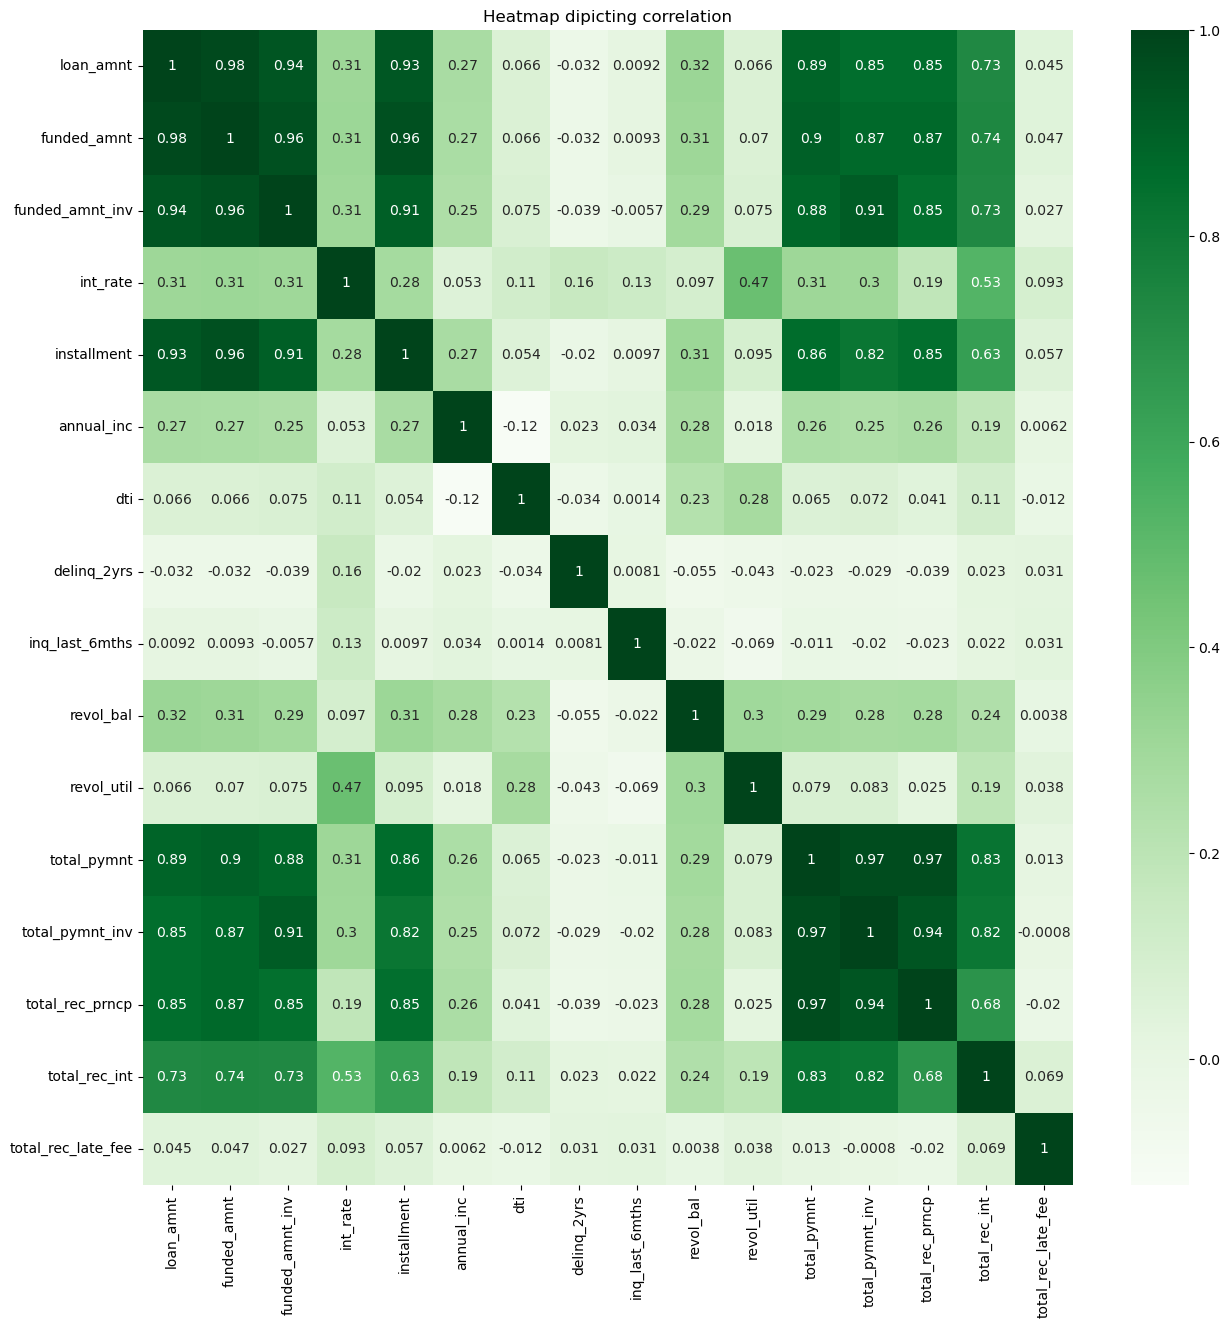

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(loan[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','revol_bal','revol_util','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee']].corr(),annot=True,cmap='Greens')
plt.title('Heatmap dipicting correlation')
plt.show()

# Univariate analysis

## Target variable: loan status - Charged Off
`As the problem statement is to identify the variables leading to loan default, we have primarily focused our analysis using loan status as a target variable`

In [35]:
loan.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [36]:
#current data is where borrowrers are still paying and the count is too low, so the data is being dropped
loan = loan[~loan.loan_status.isin(['Current'])]
#Also, I learnt that while plotting the data at a later point that out_prncp and out_prncp_inv is for current active loan applicants. So as we have not considered current, so we shall drop these two columns

In [37]:
loan.reset_index(inplace=True)

### 1. Numerical Analysis

In [38]:
numerical = ['loan_amnt','int_rate','annual_inc','dti','revol_bal','revol_util','total_pymnt']

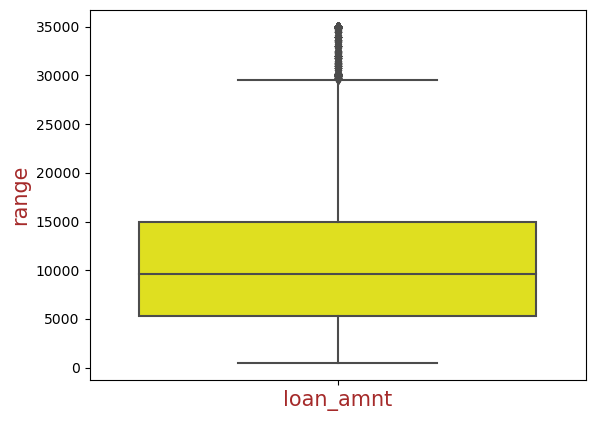

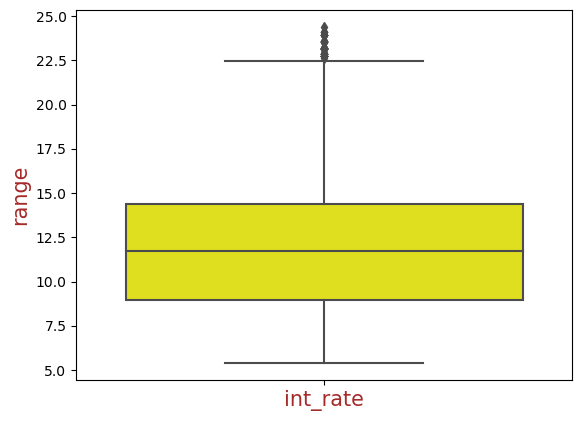

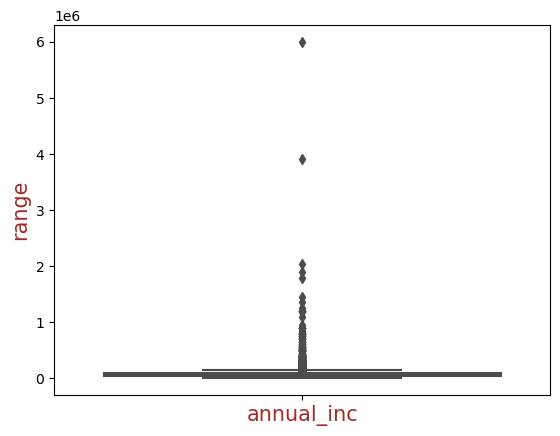

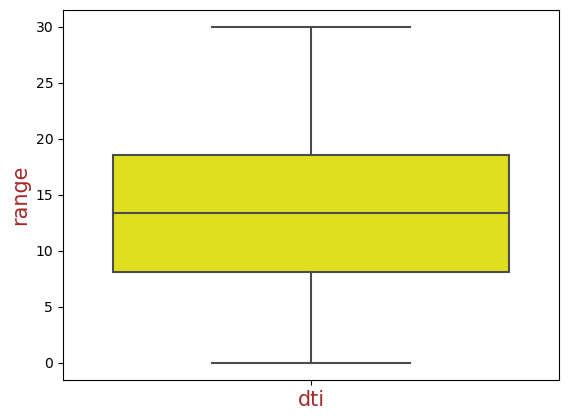

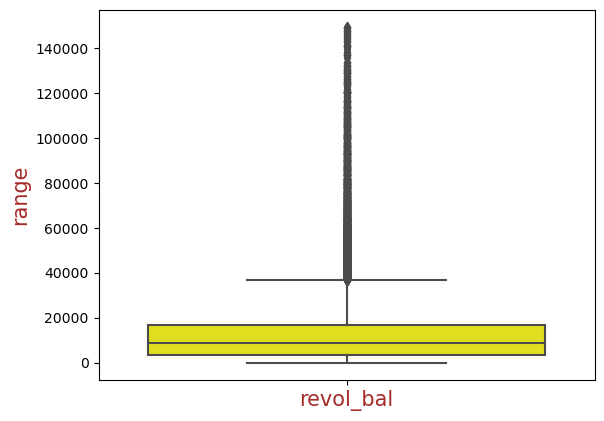

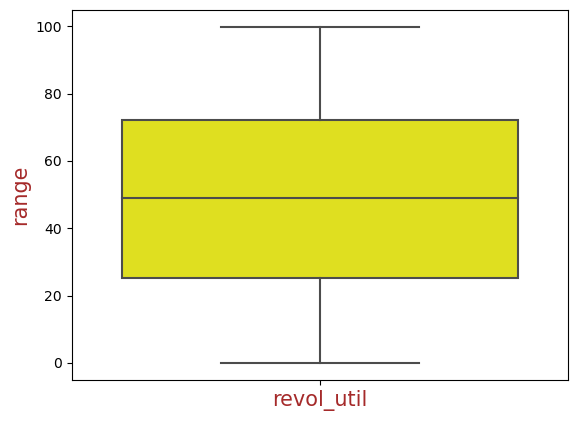

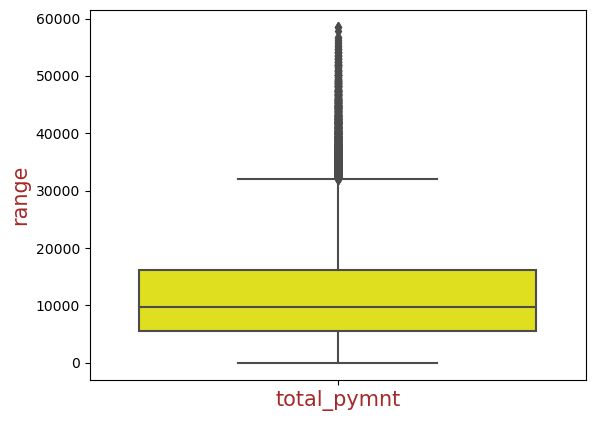

In [39]:
#Univariate Outlier analysis on Numerical data
for i in numerical:
    #loan[i].plot.box()
    sns.boxplot(loan[i],color='yellow')
    plt.xticks(visible=False)
    
    plt.xlabel(i, fontdict={'fontsize':15, 'color':'brown'})
    plt.ylabel('range', fontdict={'fontsize':15, 'color':'brown'})
    plt.show()

In [40]:
#Annual income has more outliers

loan.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [41]:
#Further breaking into quantiles to get better understanding on the salary distribution
loan.annual_inc.quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.94,0.95,0.97,0.98,0.99,1])

0.00       4000.00
0.10      30000.00
0.20      37196.16
0.30      44500.00
0.40      50004.00
0.50      58868.00
0.60      65004.00
0.70      75000.00
0.80      90000.00
0.90     115000.00
0.94     134000.00
0.95     140004.00
0.97     165000.00
0.98     187000.00
0.99     234144.00
1.00    6000000.00
Name: annual_inc, dtype: float64

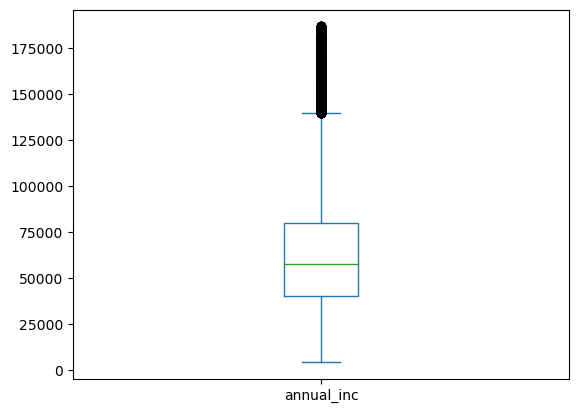

In [42]:
#So, removing employees with annual income more than 0.98 quantile
loan[loan.annual_inc <= 187000].annual_inc.plot.box()
plt.show()

In [43]:
loan = loan[~(loan.annual_inc > 187000)]
loan.shape

(37807, 46)

In [44]:
loan.reset_index(inplace=True)

In [45]:
#Analysis of revol balance:
loan.revol_bal.describe()

count     37807.000000
mean      12860.901738
std       14951.101082
min           0.000000
25%        3619.000000
50%        8653.000000
75%       16579.000000
max      149527.000000
Name: revol_bal, dtype: float64

In [46]:
loan.revol_bal.quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.94,0.95,0.97,0.98,0.99,1])

0.00         0.00
0.10      1088.00
0.20      2757.00
0.30      4515.00
0.40      6450.40
0.50      8653.00
0.60     11235.60
0.70     14460.20
0.80     19169.00
0.90     28089.80
0.94     35891.04
0.95     39335.10
0.97     49619.42
0.98     59452.60
0.99     76954.20
1.00    149527.00
Name: revol_bal, dtype: float64

In [47]:
#Retaining these values 
loan[loan.revol_bal > 100000].shape

(153, 47)

In [48]:
loan.loan_amnt.describe()

count    37807.000000
mean     10887.806491
std       7211.523635
min        500.000000
25%       5100.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### 2. Categorical Analysis

In [49]:
categorical = ['term_in_mnt', 'home_ownership','verification_status','purpose','emp_length','grade','inq_last_6mths','delinq_2yrs','pub_rec','pub_rec_bankruptcies','addr_state']

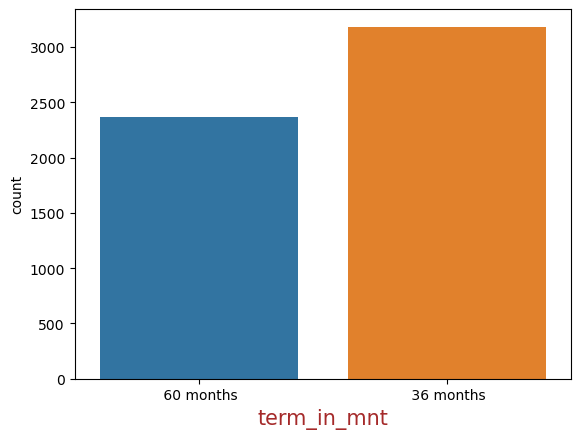

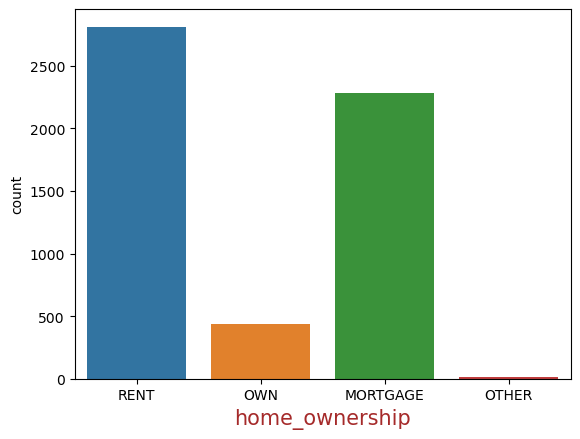

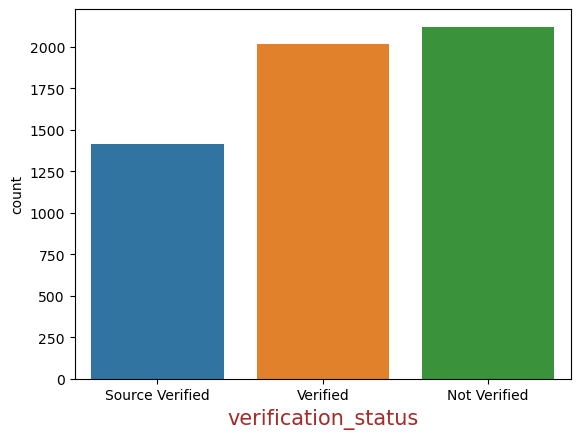

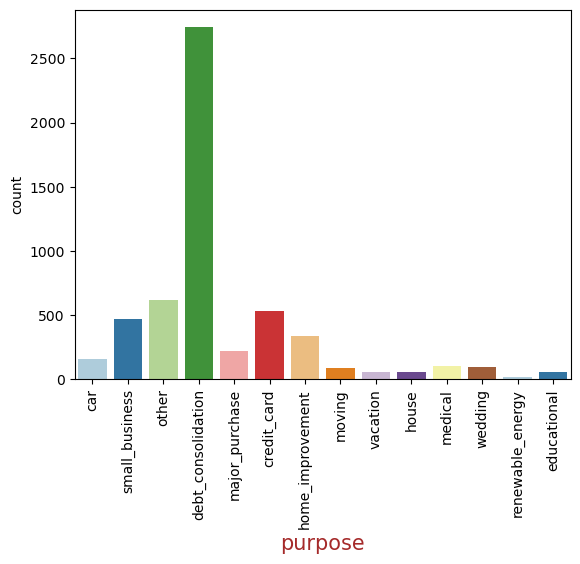

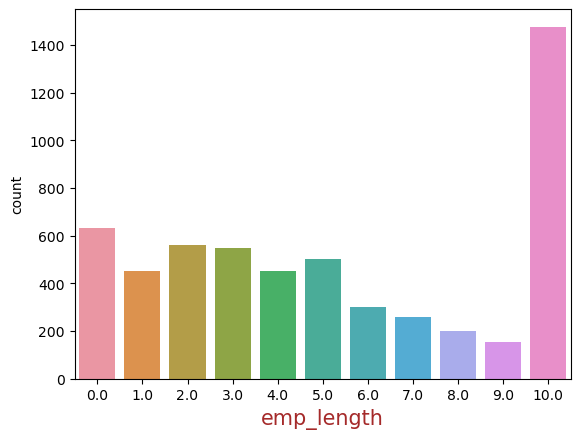

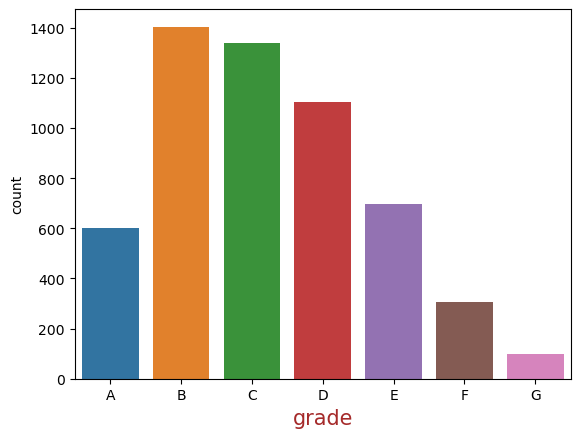

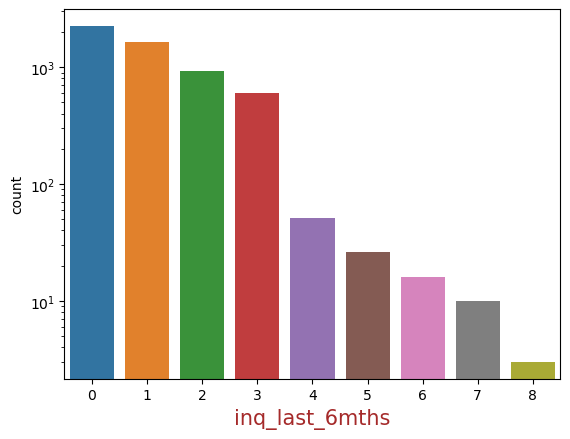

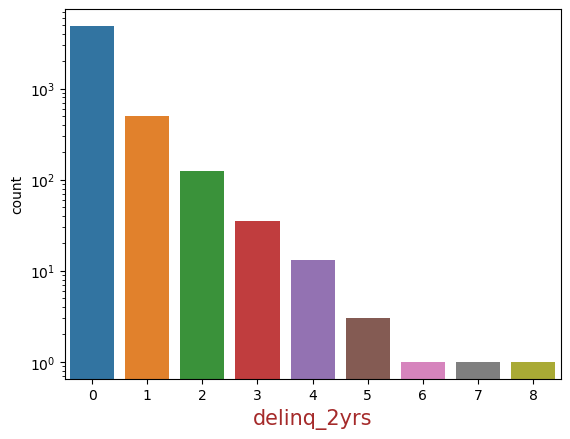

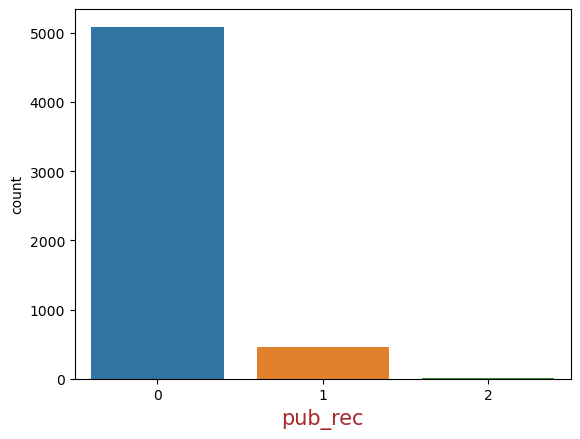

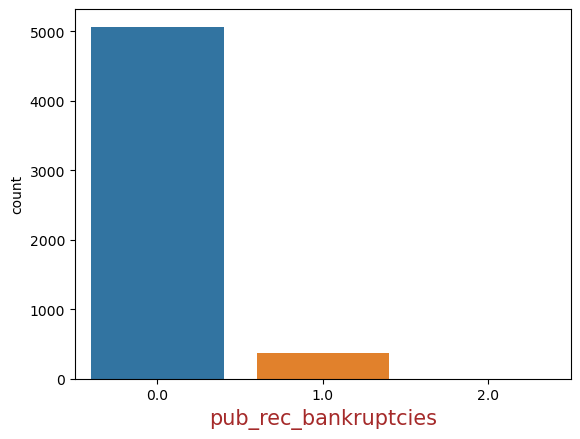

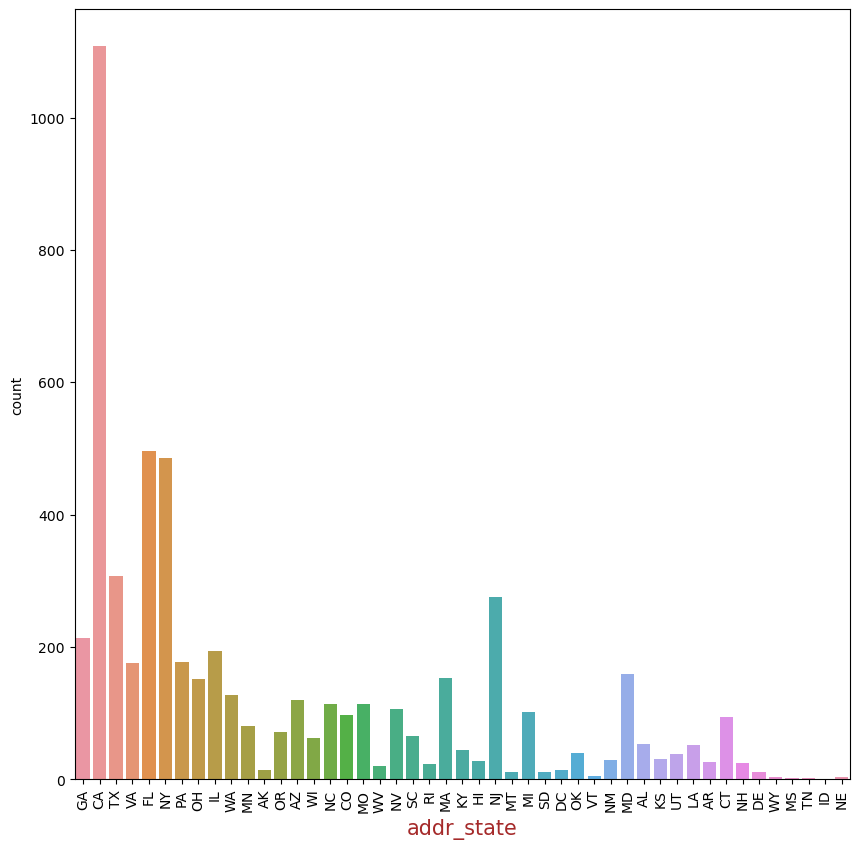

In [50]:
order = ['A','B','C','D','E','F','G']
for i in categorical:
    if i == 'purpose':
        plt.xticks(rotation=90)
        sns.countplot(x=loan[loan.loan_status.isin(['Charged Off'])][i],palette="Paired")
    elif i == 'inq_last_6mths' or i == 'delinq_2yrs':
        plt.yscale('log')
        sns.countplot(x=loan[loan.loan_status.isin(['Charged Off'])][i] )
    elif i == 'addr_state':
        plt.figure(figsize=(10,10))
        plt.xticks(rotation=90)
        sns.countplot(x=loan[loan.loan_status.isin(['Charged Off'])][i] )
    elif i == 'grade':
        sns.countplot(x=loan[loan.loan_status.isin(['Charged Off'])][i],order=order)
    else:
        sns.countplot(x=loan[loan.loan_status.isin(['Charged Off'])][i] )
    plt.xlabel(i, fontdict={'fontsize':15, 'color':'brown'})
    plt.show()

## Outcome of Univariate Analysis:
1. Loan applicants with payment term 36 month have defaulted more.
2. Loan applicants staying in rented house or motgaged house can be potential defaulters compared to own house
3. Verification status shows that not verified applicants have defaulted more. So, loan should not be approved for without verifying the loan applicants. 
4. Verification status also reveals that verified applicants are second highest defaulters. So, verification process needs to be amended.
5. Debt consolidation loans are associated with a very high default count.
6. Employees with 10 or more years of work experience have a very high default rate.
7. Borrowers falling under Grade B, C and D have defaulted more
8. Borrowers with ZERO to less no of inquiries shows have defaulted more
9. Borrowers having Zero delinquency in the borrower's credit file for the past 2 years have defaulted more.
10. Borrowers who doesn't have the history of derogatory public record have defaulted more.

__Distribution of defaulters across the map.__

In [51]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [52]:
targetLoan = loan[loan.loan_status.isin(['Charged Off'])]
state = targetLoan.groupby(by='addr_state').count()
state.sort_values('grade',ascending=True,inplace=True)

data = dict(type='choropleth',colorscale = 'Picnic',locations = state.index,
locationmode = 'USA-states', z = np.arange(1,51), text = state.grade,
marker = dict(line = dict(color = 'rgb(200,255,255)',width = 1)),
colorbar = {'title':"Loan Defaulter Count"})

In [53]:
layout = dict(geo={'scope':'usa'})

In [54]:
chmap = go.Figure(data=[data],layout=layout)
iplot(chmap)

### Outcome


1. We notice that loan applicants have defaulted more in California. Also, loan applicants were high from this region.
2. Region highlighted with blue have lower defaulter rate. With geographical plot, we notice that all the States with lower default count are adjacent to each other. 
3. It is noteworthy that states located along the border of the USA exhibit a higher default rate.

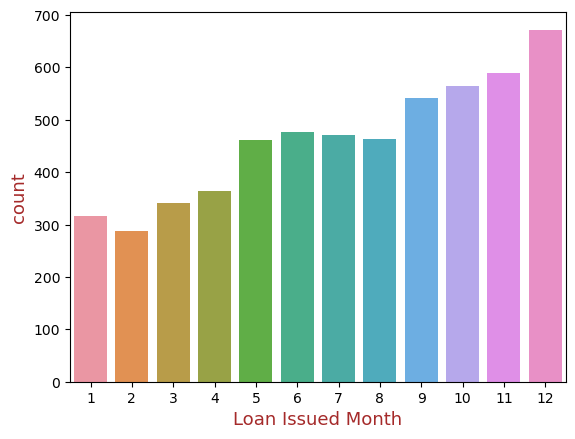

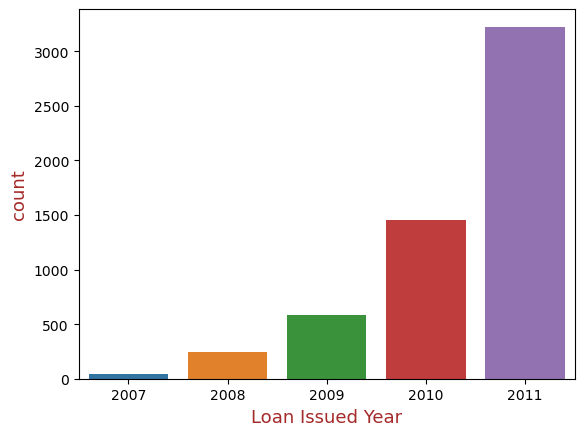

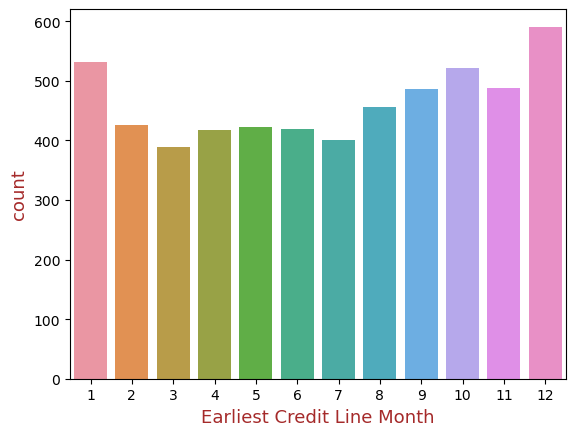

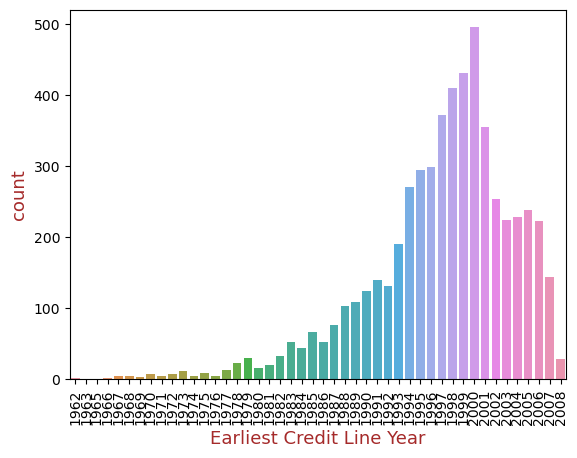

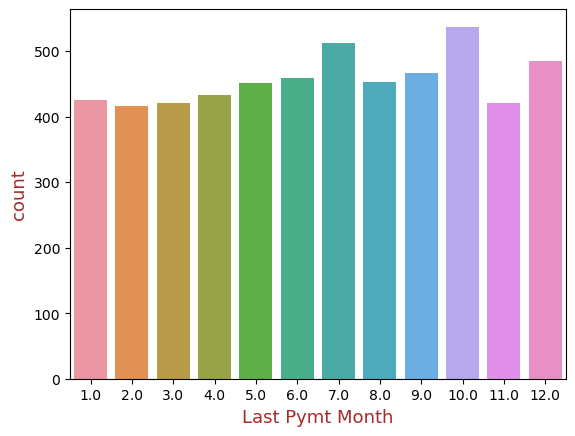

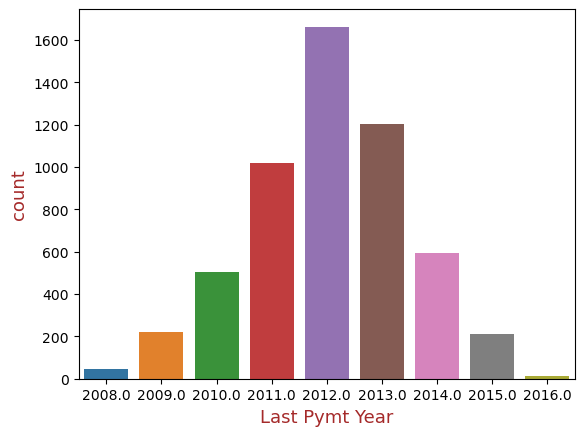

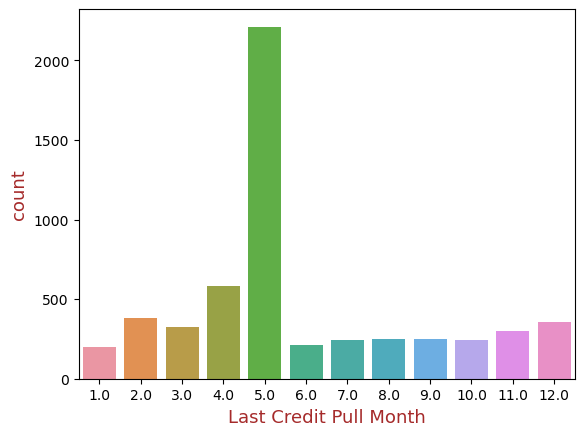

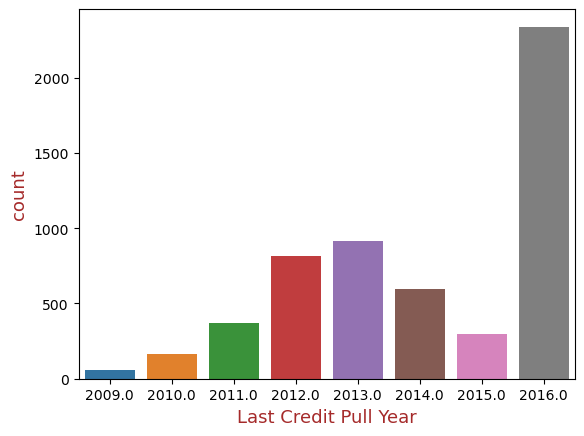

In [55]:
# catgorizing on year/month

categorical = ['issue_m','issue_y','earliest_cr_line_m','earliest_cr_line_y','last_pymnt_m','last_pymnt_y','last_credit_pull_m','last_credit_pull_y']
categoricallabel = ['Loan Issued Month', 'Loan Issued Year','Earliest Credit Line Month', 'Earliest Credit Line Year','Last Pymt Month','Last Pymt Year', 'Last Credit Pull Month','Last Credit Pull Year']
#fig,axes = plt.subplot()
for i,j in zip(categorical,categoricallabel):
#for i in categorical:
    sns.countplot(x=loan[loan.loan_status.isin(['Charged Off'])][i])
    #sns.countplot(data=loan,x=loan[i], hue='loan_status')
    #sns.histplot(data=loan,x=loan[i], hue='loan_status',stat='percent', common_norm=True,multiple="dodge", binwidth=1, weights=2)
    #for label in ax.containers:
    #    print(label)
    #    ax.bar_label(label)
    if i == 'earliest_cr_line_y':
        plt.xticks(rotation=90)
    plt.xlabel(j, fontdict={'fontsize':13, 'color':'brown'})
    plt.ylabel('count', fontdict={'fontsize':13, 'color':'brown'})
    plt.show()

## Univariate Analysis - Observation on Year/Month anaylsis:
1. Borrowers taken loan in the month of November and December have defaulted more. The probable reason could be of the vacation coming in these months.
2. Borrowers taken loan in the year 2011 have defaulted more. This could be due to the U.S.A economic conditions prevailing during that time.
3. Earliest credit pull is not giving any pattern with respect to defaulters.
4. Last Payment Year wise reveals maximum defaulters paid in 2012 and on contrary last credit pull year wise gives us maximum defaulters pulled credit in 2016. This reveals that defaulters are still borrowing money which could further burden the lenders/LC.

This suggests that LendingClub should exercise caution when lending during periods of economic uncertainty, and carefully evaluate borrowers' financial circumstances before approving loans.

LC should be cautious while lending the money during vacations

LC should impose restrictions on defaulters account for a new loan request.  

## Segmeneted Univariate Analysis

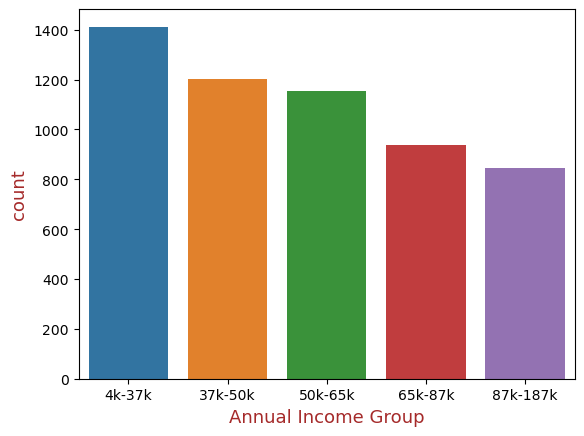

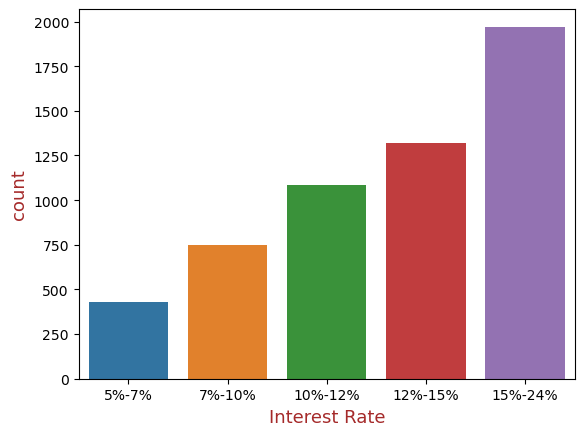

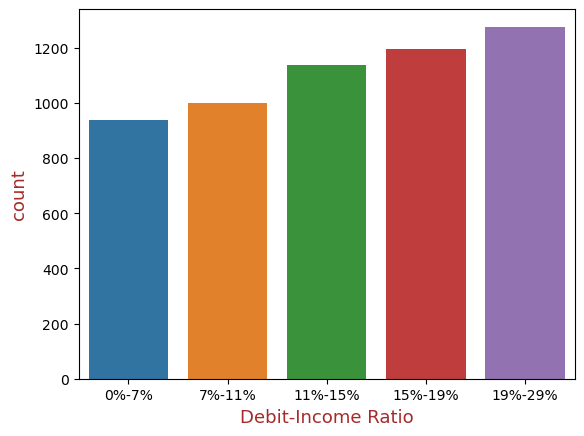

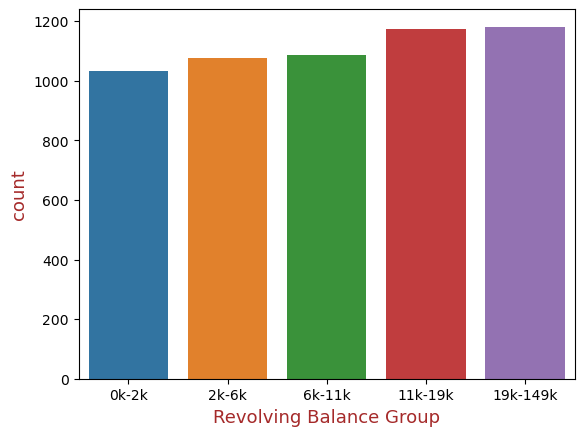

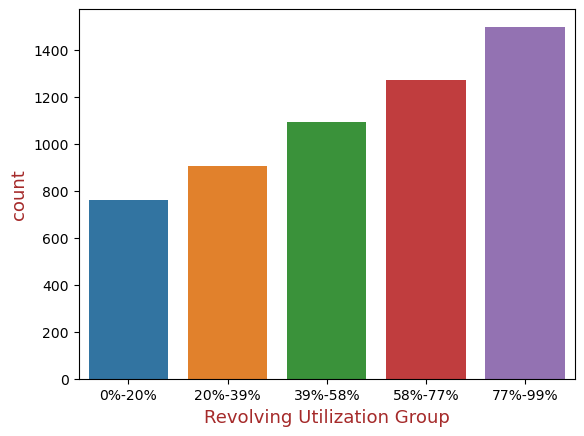

In [56]:
#Categorizing numerical columns
labels = ['VL','Low','Med','High','VH']

#This user defined function segunivariate groups numerical column values as VL,L,M,H and VH. This is achived using pandas qcut function.
#Further data visulization is handled in this function: segunivariate plots histogram with bins and this done with the help of seaborn.countplot().

def segunivariate(j,xlabel,datatype):
    sal_grp={}
    new_col = j+'_grp'
    loan[new_col] = pd.qcut(loan[j], q=[0,0.2,0.4,0.6,0.8,1],labels = labels)

    for i in labels:
        sns.countplot(x=loan[(loan.loan_status.isin(['Charged Off']))&(loan[new_col].isin([i]))][new_col])
        #sns.countplot(x=loan[loan[new_col].isin([i])][new_col],hue=loan.loan_status)

    for i in labels:
        salup = {i:[int(loan[loan[new_col].isin([i])][j].min()),int(loan[loan[new_col].isin([i])][j].max())]}
        sal_grp.update(salup)
    
    if datatype == 'Per':
        rep = ['{0}%-{1}%'.format(i[0],i[1]) for i in sal_grp.values() ]
    elif datatype == 'Num':
        rep = ['{0}k-{1}k'.format(i[0]//1000,i[1]//1000) for i in sal_grp.values() ]
    elif datatype == 'counter':
        rep = ['{0}-{1}'.format(i[0],i[1]) for i in sal_grp.values() ]
    plt.xticks([0,1,2,3,4],labels=rep)
    plt.xlabel(xlabel,fontdict={'fontsize':13, 'color':'brown'})
    plt.ylabel('count', fontdict={'fontsize':13, 'color':'brown'})
    plt.show()

xlabels = {'annual_inc': ['Annual Income Group','Num'],'int_rate':['Interest Rate','Per'],'dti':['Debit-Income Ratio','Per'],'revol_bal':['Revolving Balance Group','Num'],'revol_util':['Revolving Utilization Group','Per']}

for key,value in xlabels.items():
    segunivariate(key,value[0],value[1])
    

#Note: Seaborn countplot is not unit aware. It would plot bars at numeric positions 0,1,2,..,N-1. Hence you cannot set the ticks to non-numeric positions. You can however change the ticklabels at those positions.

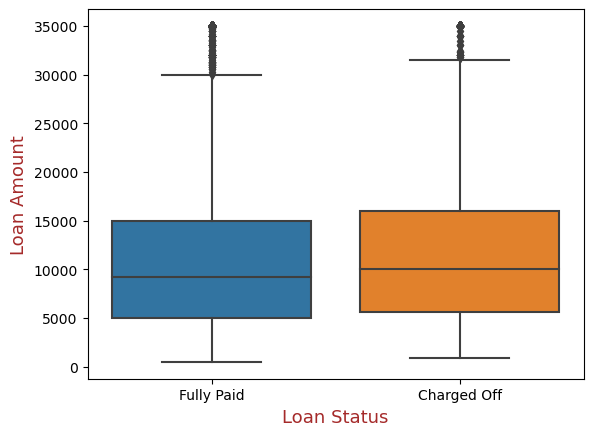

In [57]:
sns.boxplot(x=loan.loan_status,y=loan.loan_amnt)
plt.ylabel('Loan Amount', fontdict={'fontsize':13, 'color':'brown'})
plt.xlabel('Loan Status', fontdict={'fontsize':13, 'color':'brown'})
plt.show()

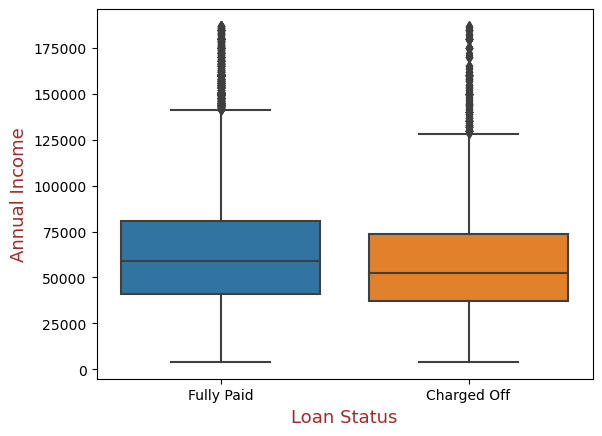

In [58]:
sns.boxplot(x=loan.loan_status,y=loan.annual_inc)
plt.xlabel('Loan Status', fontdict={'fontsize':13, 'color':'brown'})
plt.ylabel('Annual Income', fontdict={'fontsize':13, 'color':'brown'})
plt.show()

### Outcome of Segmented Univariate Analysis:
1. Low annual income group applicants have defaulted more.
2. There is a high chance with High interest rate applicants defaulting more
3. Borrowers with higher DTI ratio have defaulted more.
4. Borrowers with a high revolving utilization rate have shown a higher tendency to default.
5. When comparing fully paid and charged-off loans in relation to borrowers' loan amounts and salaries, we observe that the interquartile range (IQR) for loan amounts tends to be slightly higher for charged-off borrowers compared to fully paid borrowers. Conversely, the IQR for annual salaries is lower for charged-off borrowers compared to fully paid borrowers.

# Bivariate Analysis

In [59]:
#Numerical vs categorical bar plot. 

#Function to plot BAR GRAPH 

order=['A','B','C','D','E','F','G']
suborder=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5']

def numcat(categorical,numerical):
    for i in categorical:
        for j in numerical:
            print("BARGRAPH of",i,"V/S",j)
            if i == 'purpose':
                plt.figure(figsize=(10,10))
                plt.xticks(rotation=90)
                sns.barplot(data=loan,x=loan[i],y=loan[j], hue='loan_status', estimator='median',ci=None)
            elif i == 'grade':
                sns.barplot(data=loan,x=loan[i],y=loan[j], hue='loan_status', estimator='median', order=order)
            elif i == 'sub_grade':
                plt.figure(figsize=(10,10))
                plt.xticks(rotation=90)
                sns.barplot(data=loan,x=loan[i],y=loan[j], hue='loan_status', estimator='median', order=suborder,ci=None)
            else:
                sns.barplot(data=loan,x=loan[i],y=loan[j], hue='loan_status', estimator='median')
            plt.show()

BARGRAPH of term_in_mnt V/S loan_amnt


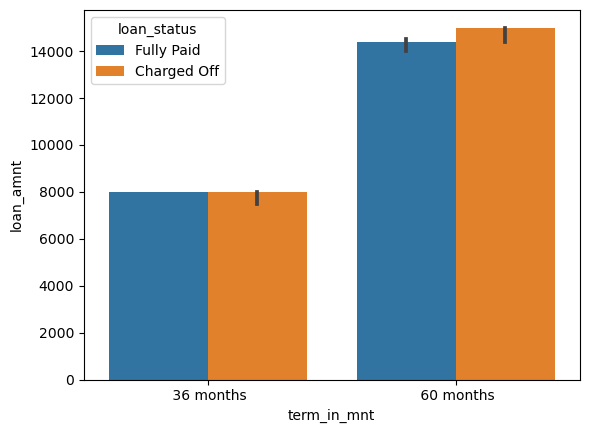

BARGRAPH of home_ownership V/S loan_amnt


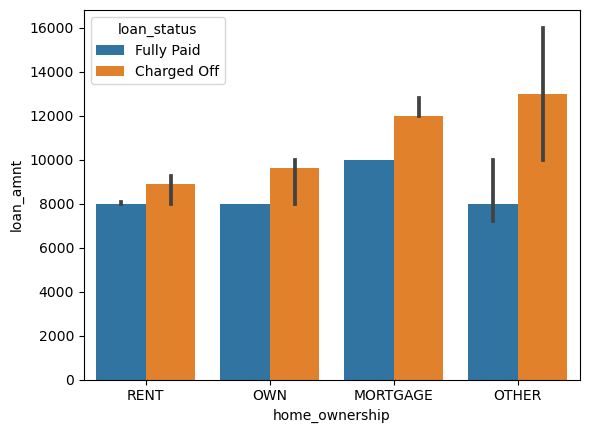

BARGRAPH of verification_status V/S loan_amnt


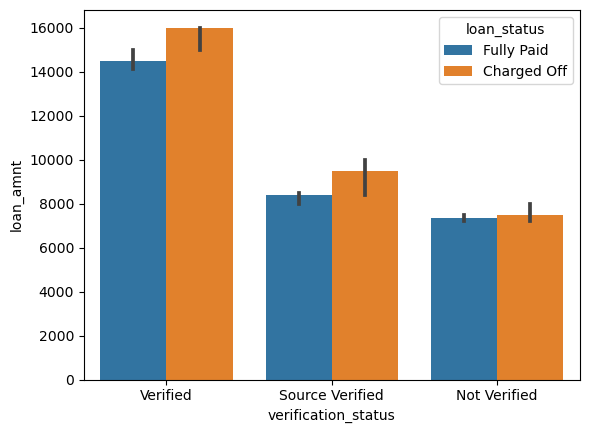

BARGRAPH of purpose V/S loan_amnt


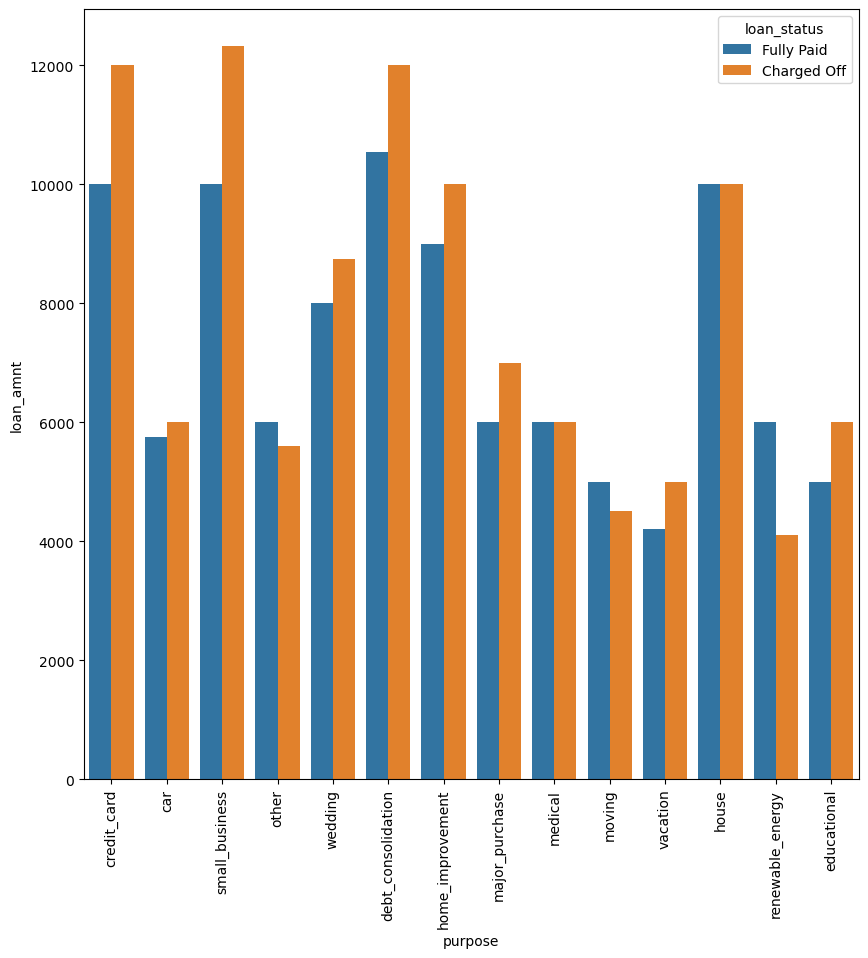

BARGRAPH of grade V/S loan_amnt


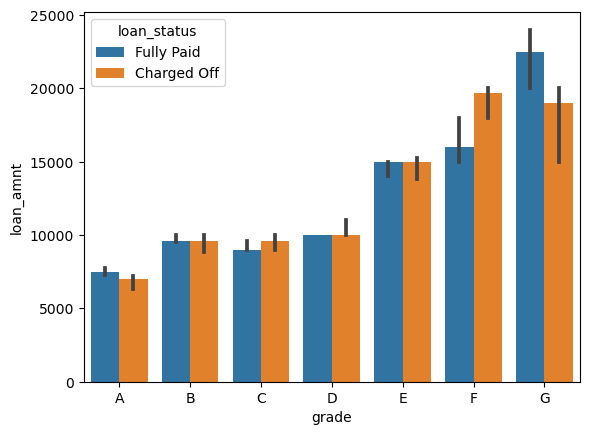

BARGRAPH of sub_grade V/S loan_amnt


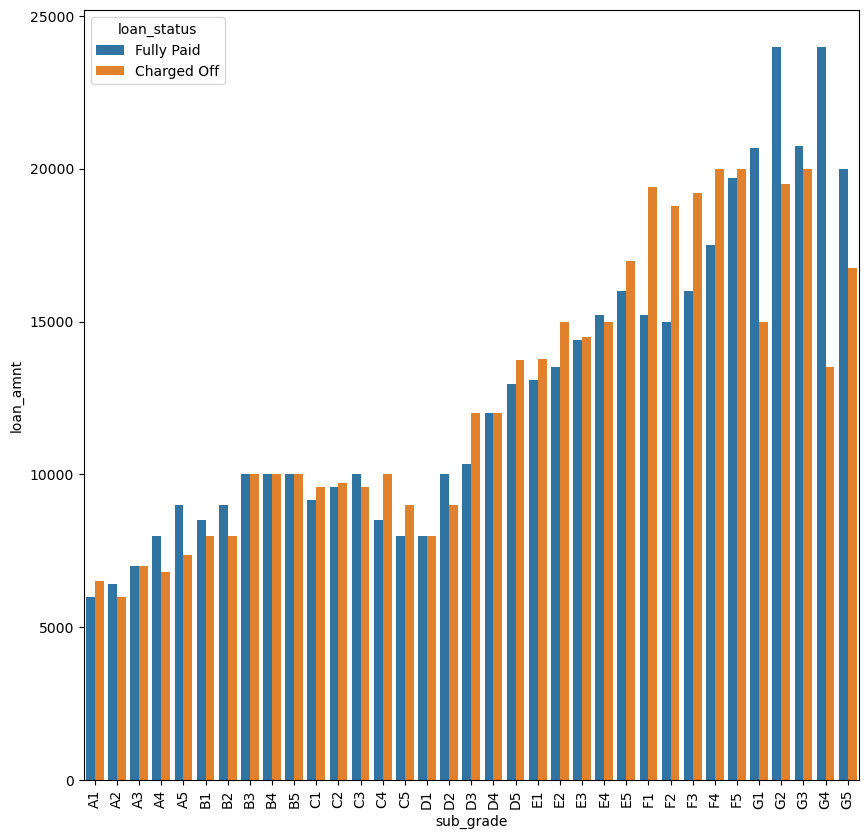

BARGRAPH of emp_length V/S loan_amnt


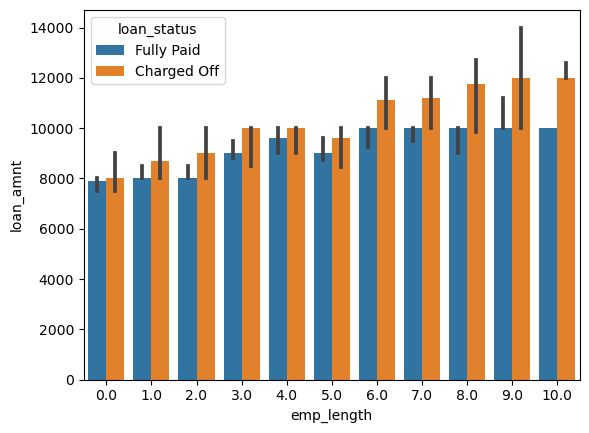

In [60]:
# Checking the loan status with loan amount vs other categories. 

numerical = ['loan_amnt']
categorical = ['term_in_mnt', 'home_ownership','verification_status','purpose','grade','sub_grade','emp_length']
numcat(categorical,numerical)


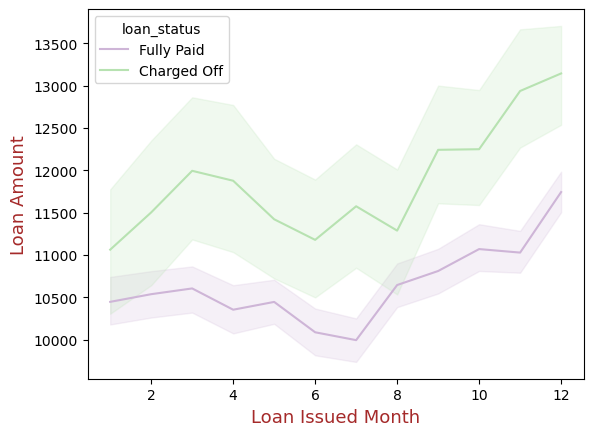

In [61]:
#Loan amount vs Loan issued Month/Year
sns.lineplot(x=loan.issue_m,y=loan.loan_amnt,hue=loan.loan_status,palette='PRGn')
plt.xlabel('Loan Issued Month',fontdict={'fontsize':13, 'color':'brown'})
plt.ylabel('Loan Amount', fontdict={'fontsize':13, 'color':'brown'})
plt.show()

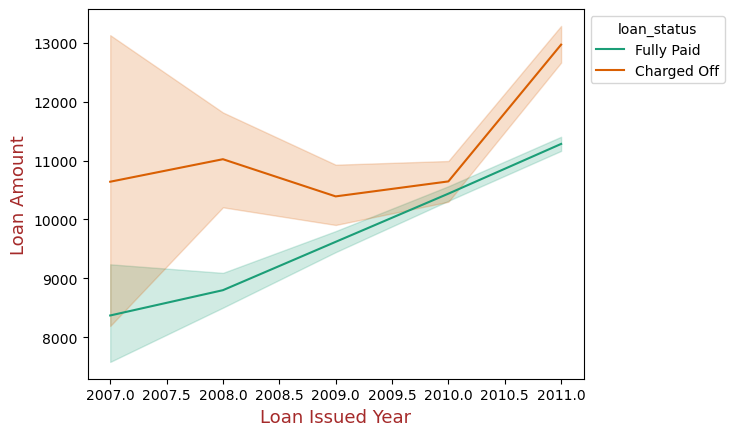

In [62]:
ax=sns.lineplot(x=loan.issue_y,y=loan.loan_amnt,hue=loan.loan_status,palette='Dark2')
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Loan Issued Year',fontdict={'fontsize':13, 'color':'brown'})
plt.ylabel('Loan Amount', fontdict={'fontsize':13, 'color':'brown'})
plt.show()

##  Outcome Loan Amount  vs Categorical:
1. Higher loan amount is approved for payment term period of 60 months
2. Borrowers who have mortgaged their house have applied for higher loan amount.  
3. Borrowers for whom home ownership status data is unavailable have applied for even higher loan amounts compared to other categories. Analysis of the plot reveals that they also tend to default on higher loan amounts.
3. Higher loan is approved for loan applicants with verified status. So, from Univariate analysis, we saw that default rate was high for verified loan applicants. So, Verification process strictly needs to be amended else there could be higher loss to LC/investors   
4. Higher loan amount is sanctioned for following purpose credit card, small business, debt consolidation. 
5. There is no significant difference in higher loan approval rates based on employees' experience. But, employees with high experience have defaulted for higher loan amount.
6. Loan vs Month/Year clearly tells that charged off loan applicants had borrowed higher loan amount. This info was derived from segmented univariate analysis. 
   Year wise count plot showed that in 2011 there were more defaulters and this plot further shows that loan approved amount is also higher for the year 2011

BARGRAPH of term_in_mnt V/S annual_inc


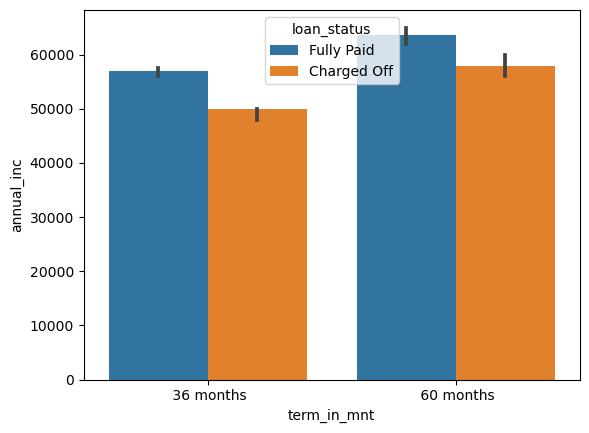

BARGRAPH of home_ownership V/S annual_inc


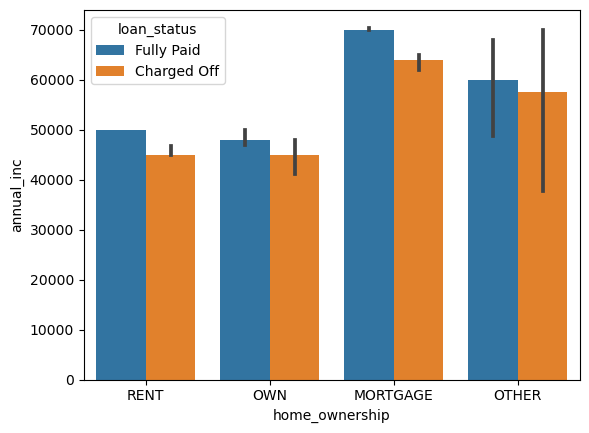

BARGRAPH of verification_status V/S annual_inc


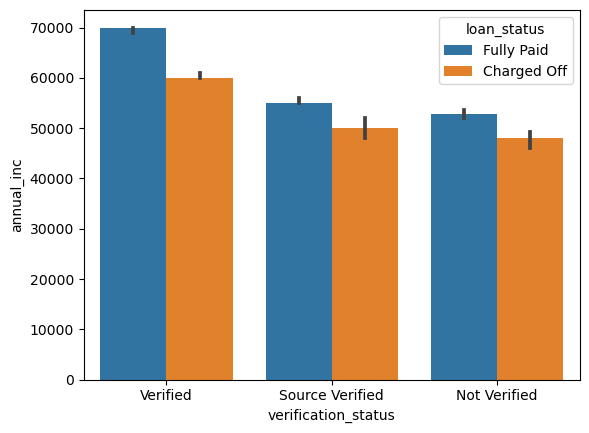

BARGRAPH of purpose V/S annual_inc


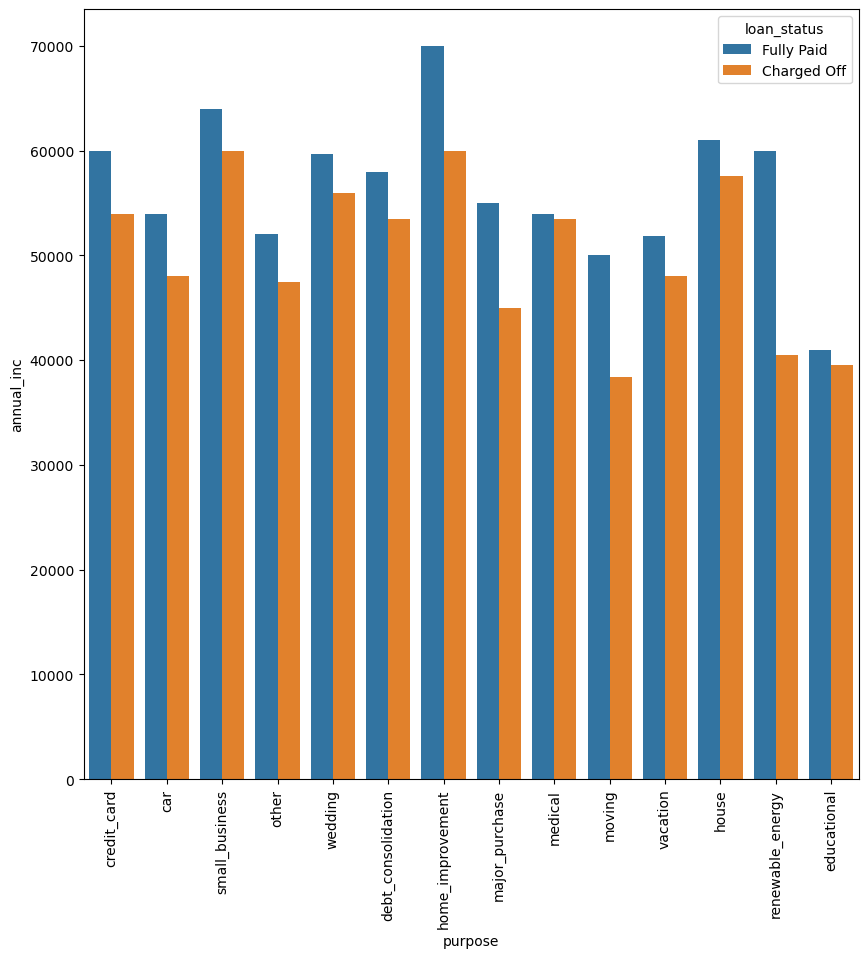

BARGRAPH of grade V/S annual_inc


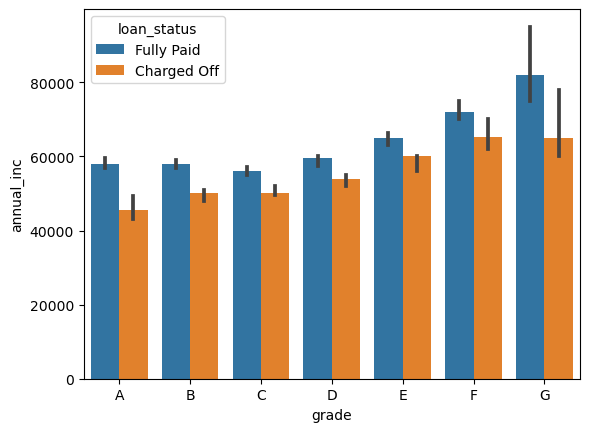

BARGRAPH of sub_grade V/S annual_inc


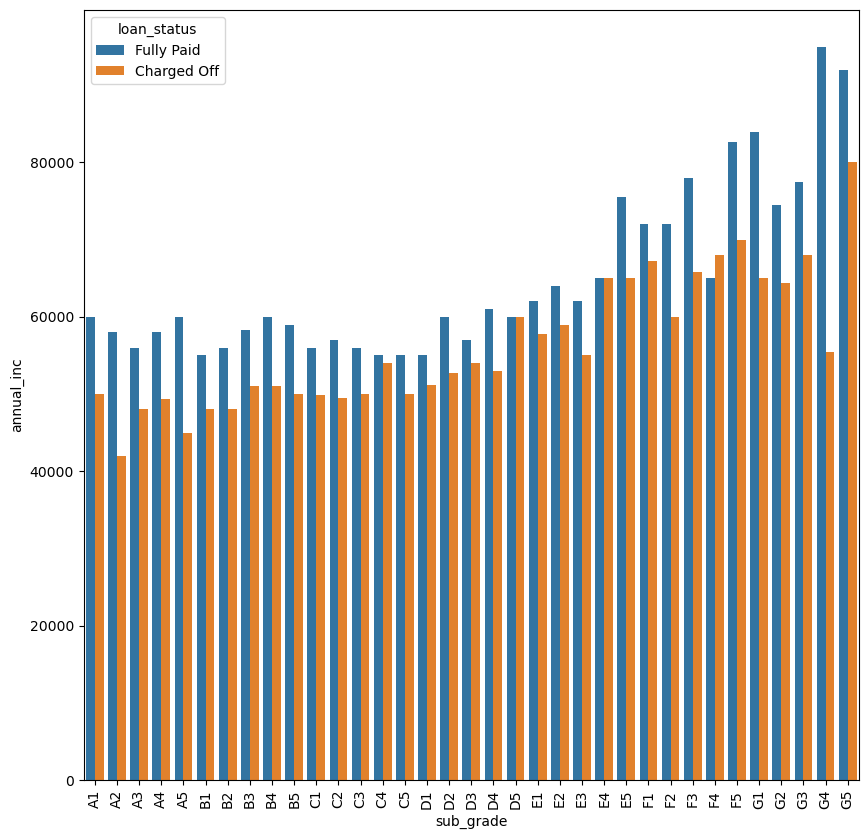

BARGRAPH of emp_length V/S annual_inc


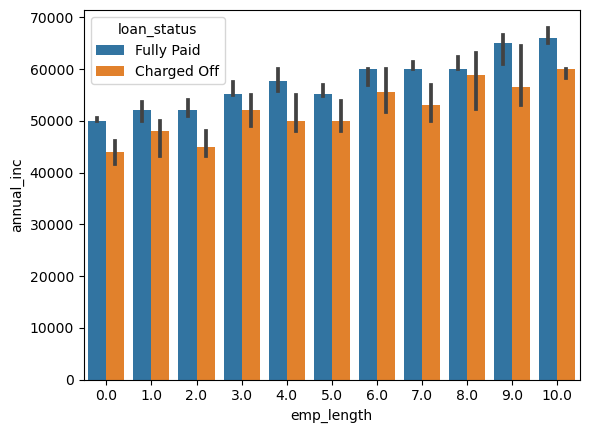

In [63]:
# Checking the loan status with Annual income vs other categories. 

numerical = ['annual_inc']
categorical = ['term_in_mnt', 'home_ownership','verification_status','purpose','grade','sub_grade','emp_length']
numcat(categorical,numerical)

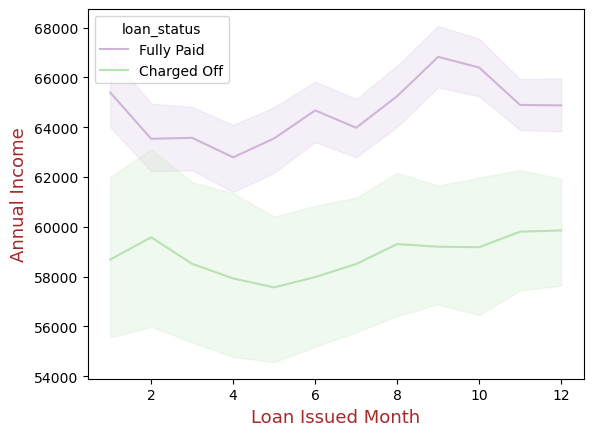

In [64]:
#Annual income vs Loan issued Month/Year
sns.lineplot(x=loan.issue_m,y=loan.annual_inc,hue=loan.loan_status,palette='PRGn')
plt.xlabel('Loan Issued Month',fontdict={'fontsize':13, 'color':'brown'})
plt.ylabel('Annual Income', fontdict={'fontsize':13, 'color':'brown'})
plt.show()

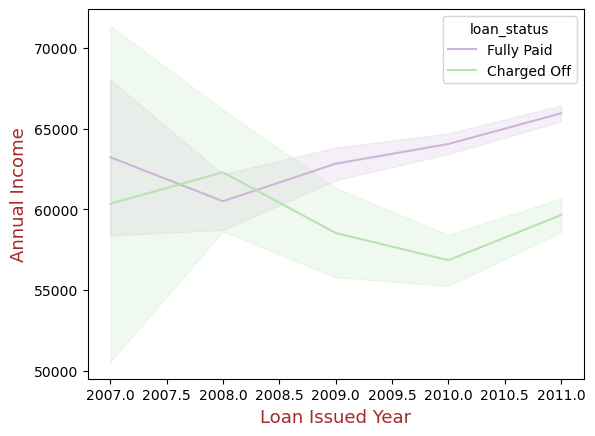

In [65]:
#Annual income vs Loan issued Month/Year
sns.lineplot(x=loan.issue_y,y=loan.annual_inc,hue=loan.loan_status,palette='PRGn')
plt.xlabel('Loan Issued Year',fontdict={'fontsize':13, 'color':'brown'})
plt.ylabel('Annual Income', fontdict={'fontsize':13, 'color':'brown'})
plt.show()

## Outcome of Annual Income:
1. Borrowers who have mortgaged their house seems to have slightly higher income.
2. Verified Loan applicants are falling in higher income group. 
3. Higher income group have applied loan for home improvement and small buisness. But overall there is no much correlation with income and purpose  
4. Higher income group have been classified under G categoery. Also, higher income group individuals are mostly distributed in G sub category distribution.
5. Year/Month Plot reveals that charged off applicants had always had lower income incomparison with fully paid loan applicants.
6. Year wise plot also reveals drop in charged off applicants annual income during the year 2008.  Further, with the given data there is a negetive trend till 2010 and slowly picked up for the charged off applicants. This could be one of major key contribuiting factor for defaulting. 

BARGRAPH of term_in_mnt V/S int_rate


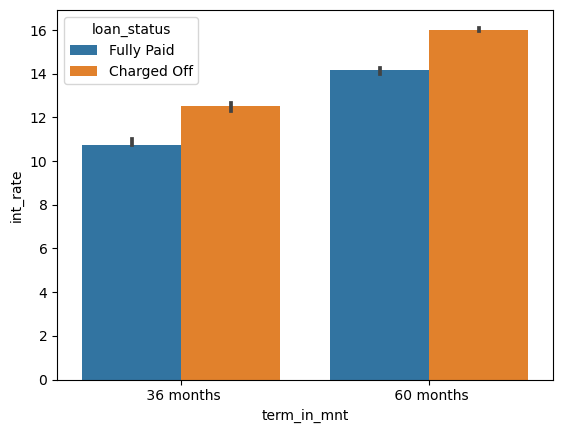

BARGRAPH of home_ownership V/S int_rate


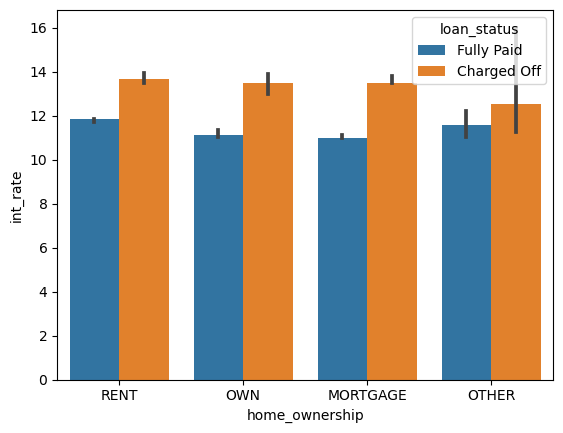

BARGRAPH of verification_status V/S int_rate


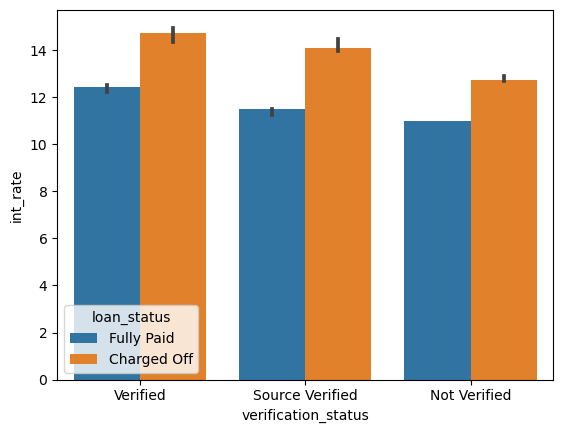

BARGRAPH of purpose V/S int_rate


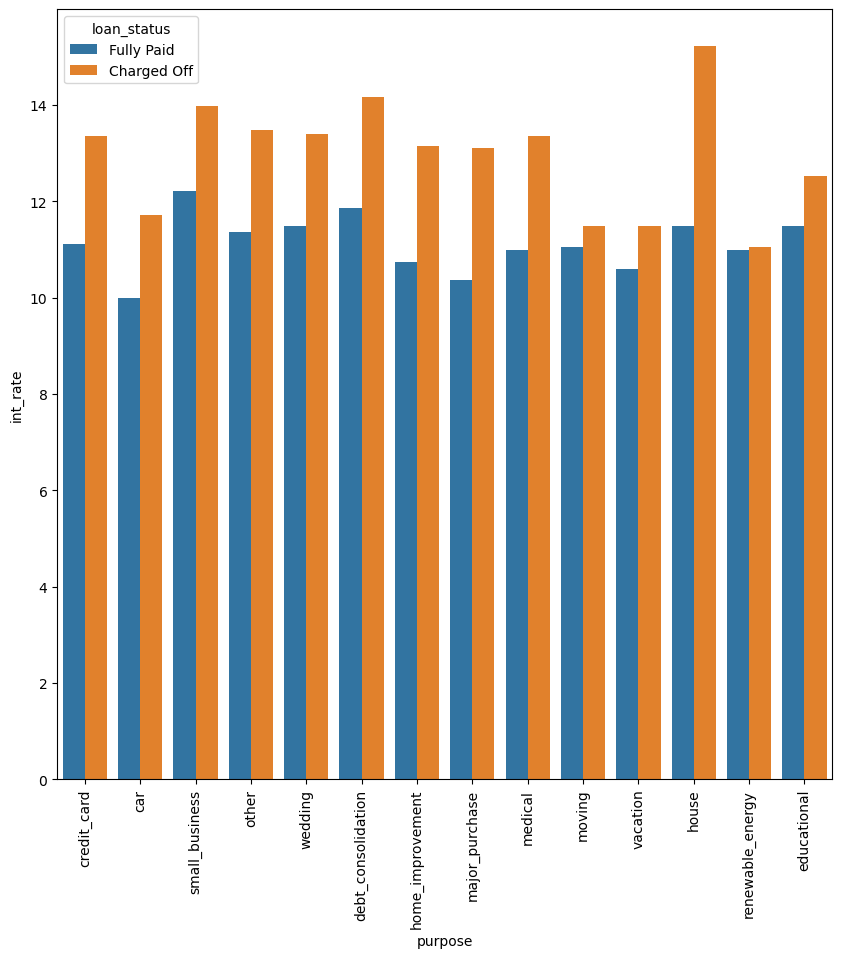

BARGRAPH of grade V/S int_rate


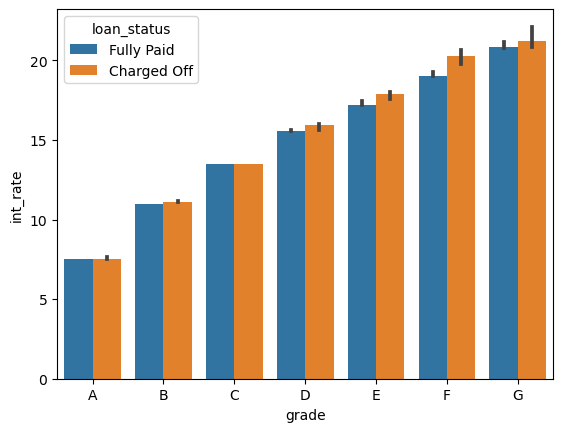

BARGRAPH of sub_grade V/S int_rate


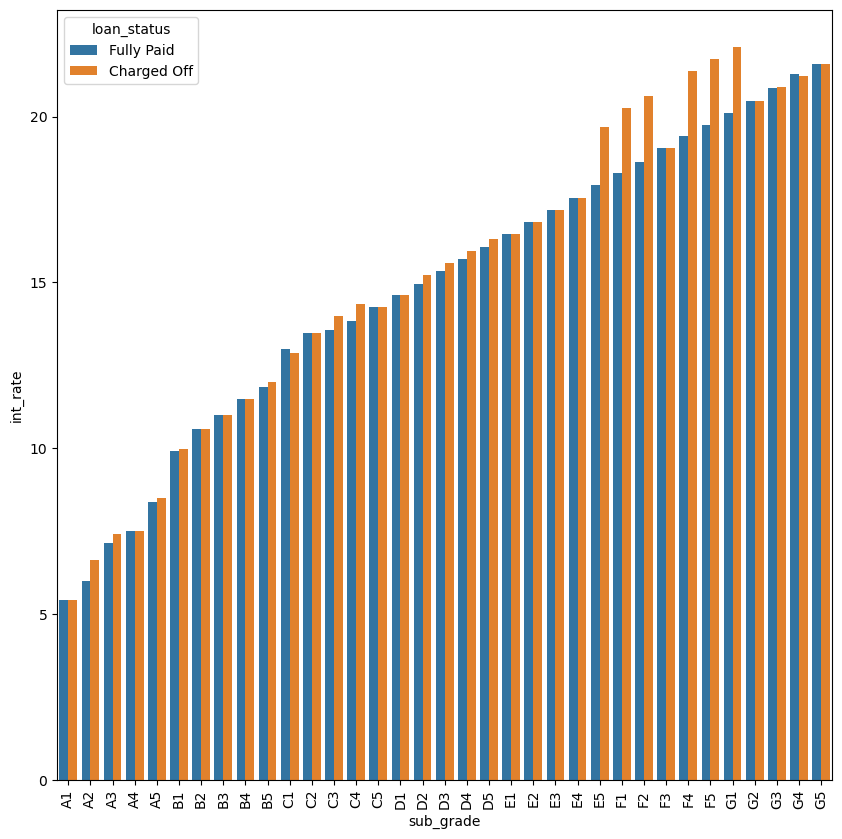

BARGRAPH of emp_length V/S int_rate


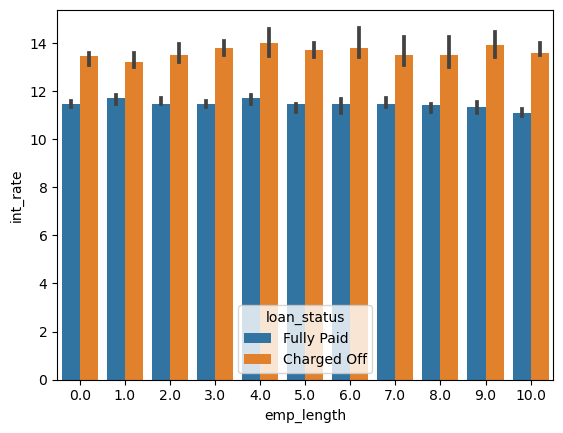

In [66]:
numerical = ['int_rate']
categorical = ['term_in_mnt', 'home_ownership','verification_status','purpose','grade','sub_grade','emp_length']
numcat(categorical,numerical)

## Outcome of Interest Rate:
1. Upon analyzing the interest rates, a discernible pattern emerges with respect to Lending Club Grade and Subgrade. The highest Grade G corresponds to the highest interest rate, while the lowest grade A is associated with the lowest interest rate.

2. Other categories doesn't show any pattern

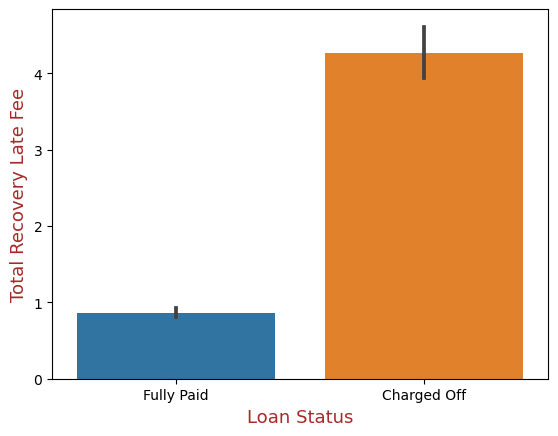

In [67]:
#One of the driving factor for defaulters 
#Categorical vs Numerical

sns.barplot(loan,x=loan.loan_status,y=loan.total_rec_late_fee)
plt.xlabel('Loan Status',fontdict={'fontsize':13, 'color':'brown'})
plt.ylabel('Total Recovery Late Fee',fontdict={'fontsize':13, 'color':'brown'})
plt.show()

In [68]:
#This shows the total late fee paid loan applicant count
pd.DataFrame(loan.total_rec_late_fee.values.nonzero()).shape

(1, 1960)

## Outcome:
1. Borrowers paying more late few can be potential defaulters. 

## Multivariate Analysis on Charged Off applicants

In [69]:
targetLoan = loan[loan.loan_status.isin(['Charged Off'])]

In [70]:
#sns.countplot(loan, x=loan.home_ownership,hue=loan.purpose)

### Home ownership vs Frequency/loan amount vs Purpose
Analyzed with loan purpose, employee experience, verification status, grade

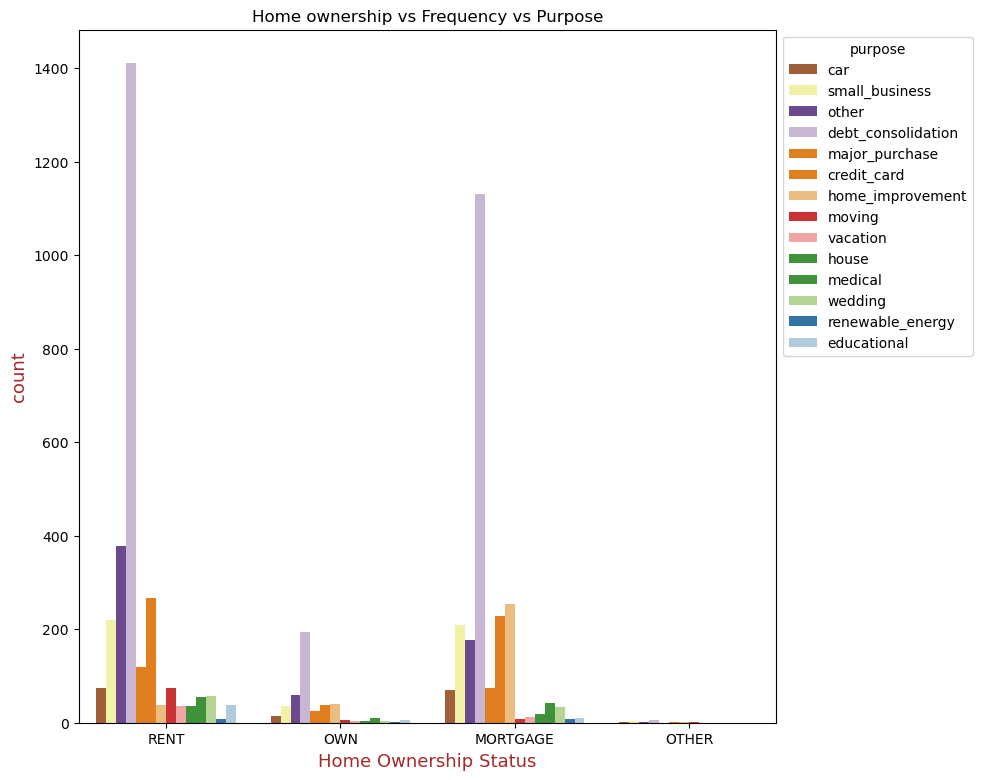

In [71]:
plt.figure(figsize=(9,9))
#ax = sns.barplot(targetLoan, x=targetLoan.home_ownership,y=targetLoan.loan_amnt,hue=targetLoan.purpose,palette='Paired_r', estimator='median', ci=None)
ax = sns.countplot(targetLoan, x=targetLoan.home_ownership,hue=targetLoan.purpose, palette='Paired_r')
plt.xlabel('Home Ownership Status', fontdict={'fontsize':13, 'color':'brown'})
plt.ylabel('count', fontdict={'fontsize':13, 'color':'brown'})
plt.title('Home ownership vs Frequency vs Purpose')
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.show()

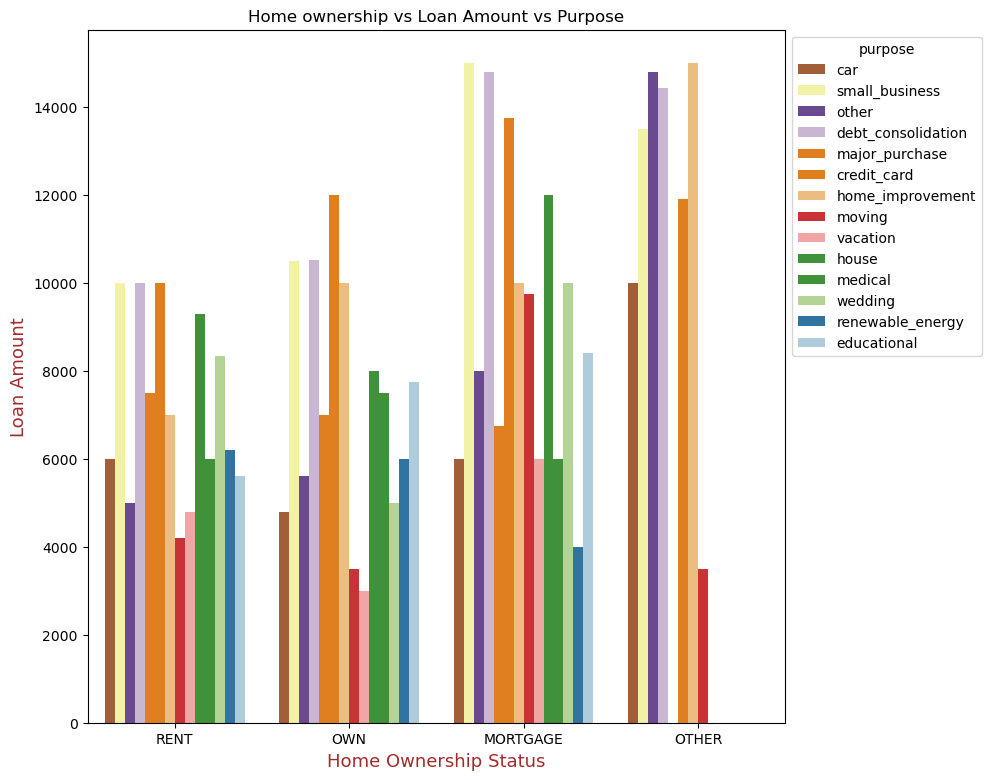

In [72]:
plt.figure(figsize=(9,9))
ax = sns.barplot(targetLoan, x=targetLoan.home_ownership,y=targetLoan.loan_amnt,hue=targetLoan.purpose,palette='Paired_r', estimator='median', ci=None)
plt.xlabel('Home Ownership Status', fontdict={'fontsize':13, 'color':'brown'})
plt.ylabel('Loan Amount', fontdict={'fontsize':13, 'color':'brown'})
plt.title('Home ownership vs Loan Amount vs Purpose')
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.show()

## Outcome

1. Home Ownership vs frequency plot reveals that loan applicants staying in Rented house or who have Mortgaged house are the ones who have applied loan for debt consolidation and they have defaulted more. 
2. Home Ownership vs Loan Amount reveals that loan applicants staying in mortgaged house applied for a higher loan amount for small business, debt consolidation and credit card
3. Home Ownership with status Other and purpose Other is approved with higher loan amount. This kind of applicants needs to be verified before approving loan.


### Home ownership vs Frequncy/Loan Amount vs employment length

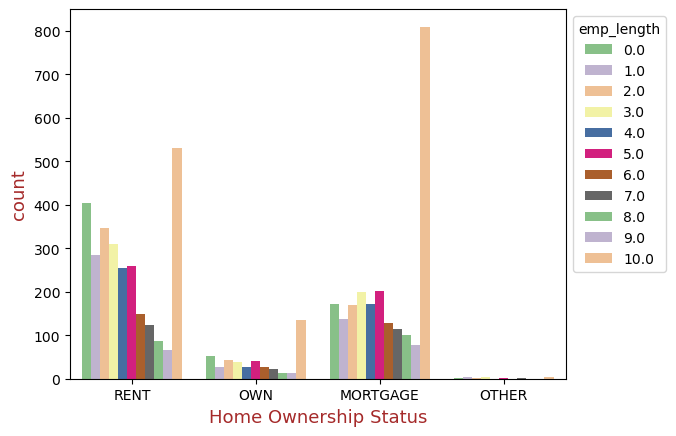

In [73]:
ax=sns.countplot(targetLoan, x=targetLoan.home_ownership,hue=targetLoan.emp_length,palette='Accent')
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Home Ownership Status', fontdict={'fontsize':13, 'color':'brown'})
plt.ylabel('count', fontdict={'fontsize':13, 'color':'brown'})
plt.show()

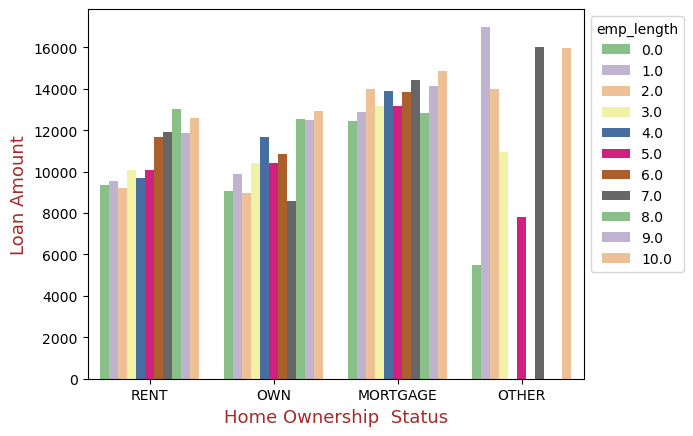

In [74]:
ax=sns.barplot(targetLoan, x=targetLoan.home_ownership,y=targetLoan.loan_amnt,hue=targetLoan.emp_length,palette='Accent',ci=None)
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Home Ownership  Status', fontdict={'fontsize':13, 'color':'brown'})
plt.ylabel('Loan Amount', fontdict={'fontsize':13, 'color':'brown'})
plt.show()

## Outcome

From the above plot, we see that majority of employees who have mortgaged their house is having 10 or more years of experience and probability of them defaulting more is very high.

Second highest defaulters are employees having 10 or more years of experience staying in rented house.

### Home Ownership vs Frequency vs DTI

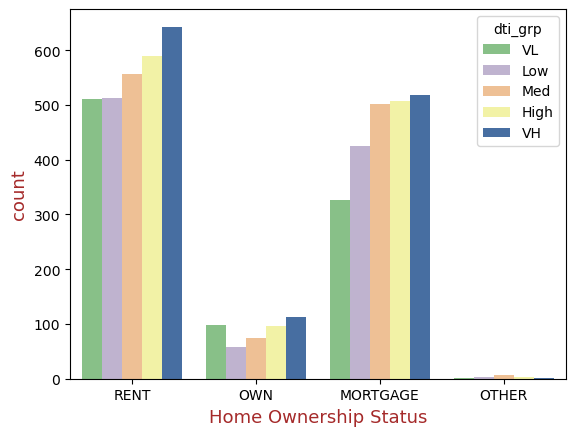

In [75]:
sns.countplot(targetLoan, x=targetLoan.home_ownership,hue=targetLoan.dti_grp,palette='Accent')
plt.xlabel('Home Ownership Status', fontdict={'fontsize':13, 'color':'brown'})
plt.ylabel('count', fontdict={'fontsize':13, 'color':'brown'})
plt.show()

### Outcome

From this plot, we see that borrowers staying in Rented house with very high _DTI_ have defaulted more. Borrowers who have mortgaged their house also has higher DTI.

### Home Ownership vs frequency/loan amount vs interest rate

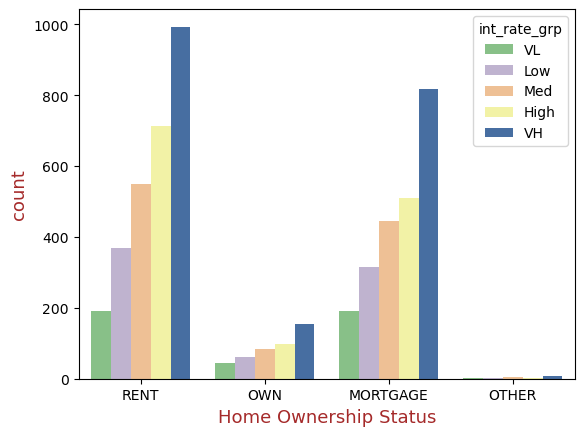

In [76]:
sns.countplot(targetLoan, x=targetLoan.home_ownership,hue=targetLoan.int_rate_grp,palette='Accent')
plt.xlabel('Home Ownership Status', fontdict={'fontsize':13, 'color':'brown'})
plt.ylabel('count', fontdict={'fontsize':13, 'color':'brown'})
plt.show()

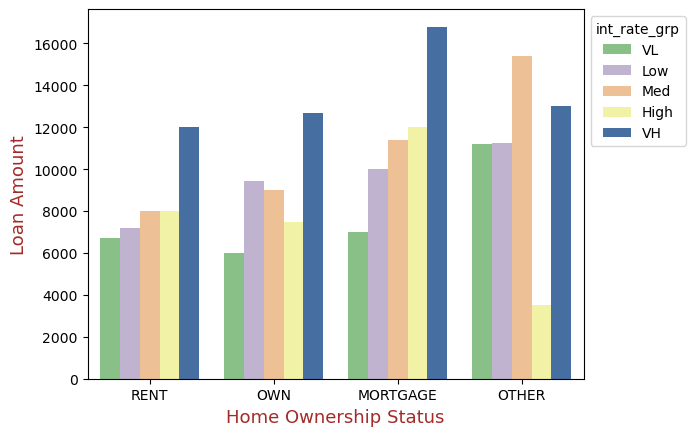

In [77]:
ax= sns.barplot(targetLoan, x=targetLoan.home_ownership,y=targetLoan.loan_amnt,hue=targetLoan.int_rate_grp,palette='Accent',estimator='median', ci=None)
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Home Ownership Status', fontdict={'fontsize':13, 'color':'brown'})
plt.ylabel('Loan Amount', fontdict={'fontsize':13, 'color':'brown'})
plt.show()

### Home Ownership vs frequency vs revolving Util rate

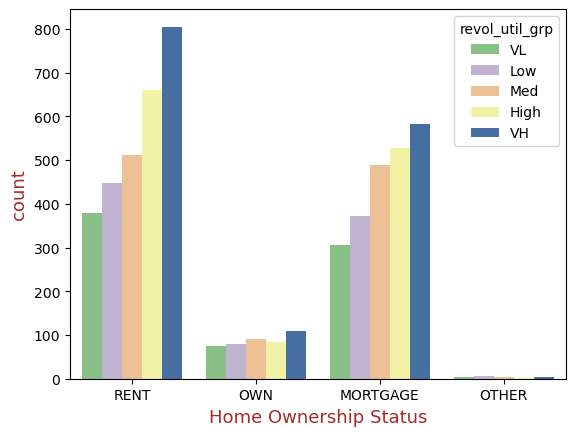

In [78]:
sns.countplot(targetLoan, x=targetLoan.home_ownership,hue=targetLoan.revol_util_grp,palette='Accent')
plt.xlabel('Home Ownership Status', fontdict={'fontsize':13, 'color':'brown'})
plt.ylabel('count', fontdict={'fontsize':13, 'color':'brown'})
plt.show()

## Outcome

Above plots tells that, 
1. higher interest is levied on higher loan amount. 
2. Borrowers taken higher interest rate staying in rented house have defaulted more. 2nd highest being the borrowers with mortgaged house

### Purpose vs frequency vs employment length

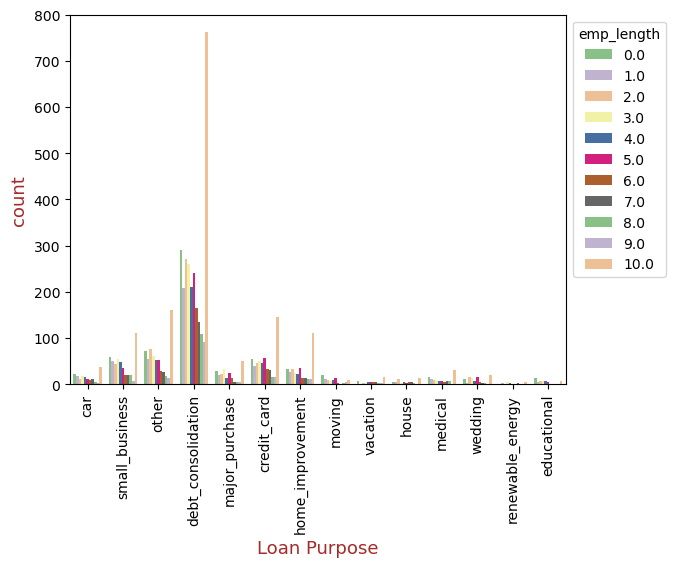

In [79]:
ax=sns.countplot(targetLoan, x=targetLoan.purpose,hue=targetLoan.emp_length,palette='Accent')
plt.xticks(rotation=90)
plt.xlabel('Loan Purpose', fontdict={'fontsize':13, 'color':'brown'})
plt.ylabel('count', fontdict={'fontsize':13, 'color':'brown'})
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.show()

## Outcome
Above plot reveals that, employees with experience 10 and more have applied loan for debt consolidation have defaulted more

# Note: For the analysis, kindly check the OUTCOME after every section